# 1. Project description

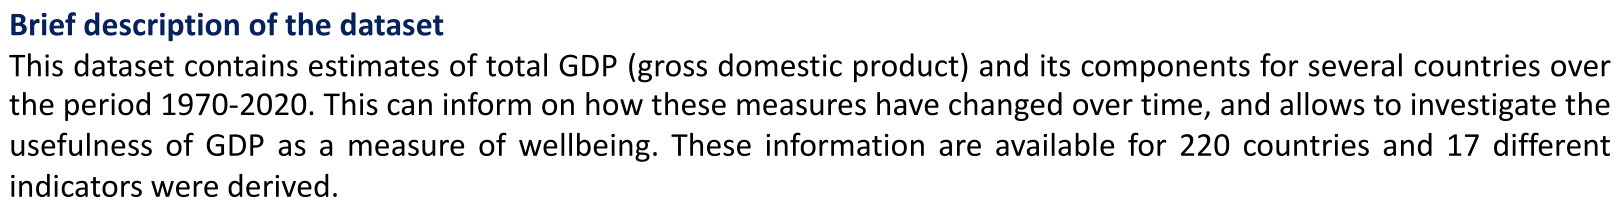

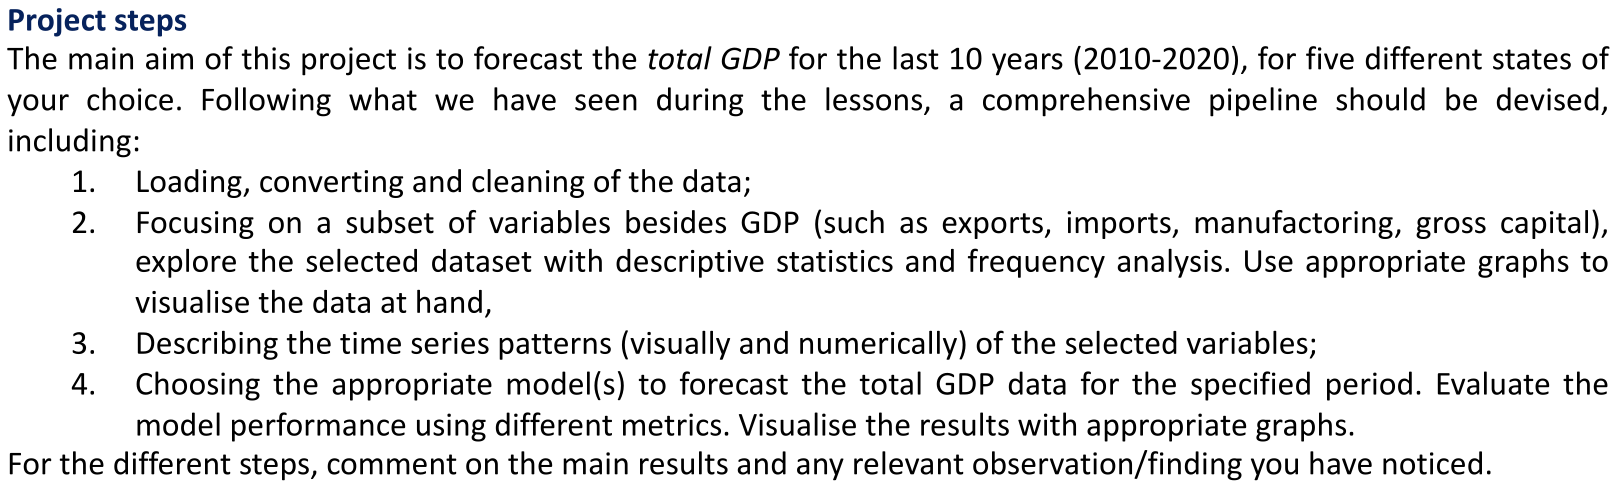

# 2. Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy.fft import fft
from statsmodels.tsa.seasonal import seasonal_decompose
import functions as f
from cycler import cycler
import warnings
warnings.filterwarnings("ignore")

# Set default display parameters
#plt.rcParams['figure.figsize'] = [8, 6]
#plt.rcParams['figure.dpi'] = 140
#plt.rcParams['axes.prop_cycle'] = cycler(color=['#7180AC', '#6A605C', 'b', 'y'])
#plt.rcParams['lines.linewidth'] = 2.5
#plt.rcParams['axes.facecolor'] = 'black'

# 3. Create dataframes

In [2]:
df_iniziale = pd.read_csv('GDPconstant-USD-countries.csv', index_col = 'CountryID')

df, valid_nations = f.preprocess_df(df_iniziale)

In [3]:
df.head(3)

Country                                      IndicatorName  \
CountryID                                                               
8          Albania                      Final consumption expenditure   
8          Albania  Household consumption expenditure (including N...   
8          Albania   General government final consumption expenditure   

                   1970          1971          1972          1973  \
CountryID                                                           
8          2.035896e+09  2.117670e+09  2.202717e+09  2.290083e+09   
8          1.952117e+09  2.030508e+09  2.112067e+09  2.195867e+09   
8          8.830853e+07  9.187170e+07  9.554977e+07  9.931108e+07   

                   1974          1975          1976          1977  ...  \
CountryID                                                          ...   
8          2.383229e+09  2.478907e+09  2.573526e+09  2.686010e+09  ...   
8          2.285082e+09  2.376931e+09  2.467748e+09  2.575058e+09  ...   
8          1.034472e+08  1.074913e+08  1.115066e+08  1.169159e+08  ...   

                   2011          2012          2013          2014  \
CountryID                                                           
8          9.829417e+09  9.841766e+09  1.003528e+10  1.036170e+10   
8          8.662830e+09  8.673986e+09  8.833231e+09  9.081697e+09   
8          1.167228e+09  1.168429e+09  1.202395e+09  1.279283e+09   

                   2015          2016          2017          2018  \
CountryID                                                           
8          1.045381e+10  1.070931e+10  1.098068e+10  1.129870e+10   
8          9.188655e+09  9.383914e+09  9.613148e+09  9.922240e+09   
8          1.265160e+09  1.324583e+09  1.366461e+09  1.376212e+09   

                   2019          2020  
CountryID                              
8          1.165178e+10  1.142641e+10  
8          1.023528e+10  1.002502e+10  
8          1.416324e+09  1.400874e+09  

[3 rows x 53 columns]

In [4]:
nation_list = f.create_nation_list(valid_nations, df)
nation_list

['Finland', 'Sweden', 'Portugal', 'Algeria', 'Germany']

Default target countries = Finland, Sweden, Portugal, Algeria, Germany

Default target variables = Import, Export, Manufacturing, Gross Capital

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 8 to 716
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1921 non-null   object 
 1   IndicatorName  1921 non-null   object 
 2   1970           1921 non-null   float64
 3   1971           1921 non-null   float64
 4   1972           1921 non-null   float64
 5   1973           1921 non-null   float64
 6   1974           1921 non-null   float64
 7   1975           1921 non-null   float64
 8   1976           1921 non-null   float64
 9   1977           1921 non-null   float64
 10  1978           1921 non-null   float64
 11  1979           1921 non-null   float64
 12  1980           1921 non-null   float64
 13  1981           1921 non-null   float64
 14  1982           1921 non-null   float64
 15  1983           1921 non-null   float64
 16  1984           1921 non-null   float64
 17  1985           1921 non-null   float64
 18  1986          

In [6]:
df_1 = df[df['Country'] == nation_list[0]]
df_1 = f.create_df(df_1)
df_2 = df[df['Country'] == nation_list[1]]
df_2 = f.create_df(df_2)
df_3 = df[df['Country'] == nation_list[2]]
df_3 = f.create_df(df_3)
df_4 = df[df['Country'] == nation_list[3]]
df_4 = f.create_df(df_4)
df_5 = df[df['Country'] == nation_list[4]]
df_5 = f.create_df(df_5)

df_list = [df_1, df_2, df_3, df_4, df_5]

In [7]:
for idx, df in enumerate(df_list):
    print(nation_list[idx])
    print(df.info())
    print('----------------------------------------------')

Finland
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 1970-01-01 to 2020-01-01
Freq: YS-JAN
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB
None
----------------------------------------------
Sweden
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 1970-01-01 to 2020-01-01
Freq: YS-JAN
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)
mem

Change from object type to float type

In [8]:
df_1 = df_1.astype(float)
df_2 = df_2.astype(float)
df_3 = df_3.astype(float)
df_4 = df_4.astype(float)
df_5 = df_5.astype(float)

# 4. Descriptive statistics

In [9]:
for df in df_list:
    display(df.describe())

Exports       Imports  Manufacturing  Gross_capital           GDP
count   5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
unique  5.100000e+01  5.100000e+01   5.100000e+01   5.000000e+01  5.100000e+01
top     1.066242e+10  1.400966e+10   8.941799e+09   3.074888e+10  7.886801e+10
freq    1.000000e+00  1.000000e+00   1.000000e+00   2.000000e+00  1.000000e+00

Exports       Imports  Manufacturing  Gross_capital           GDP
count   5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
unique  5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
top     2.866925e+10  3.890673e+10   2.446539e+10   5.782988e+10  1.961502e+11
freq    1.000000e+00  1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00

Exports       Imports  Manufacturing  Gross_capital           GDP
count   5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
unique  5.000000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
top     8.332350e+09  9.110343e+09   8.717461e+09   1.500860e+10  6.645447e+10
freq    2.000000e+00  1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00

Exports       Imports  Manufacturing  Gross_capital           GDP
count   5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
unique  5.000000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
top     4.322627e+10  9.276188e+09   1.414257e+09   1.283881e+10  3.485847e+10
freq    2.000000e+00  1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00

Exports       Imports  Manufacturing  Gross_capital           GDP
count   5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
unique  5.100000e+01  5.100000e+01   5.100000e+01   5.100000e+01  5.100000e+01
top     1.533990e+11  1.618174e+11   3.625062e+11   4.146930e+11  1.398222e+12
freq    1.000000e+00  1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00

Check for the variable with the highest correlation with GDP

In [10]:
corr_1 = df_1.corr()
corr_2 = df_2.corr()
corr_3 = df_3.corr()
corr_4 = df_4.corr()
corr_5 = df_5.corr()

corr_list = [corr_1, corr_2, corr_3, corr_4, corr_5]

max_list = []
f.highest_corr_variable(corr_list, max_list, nation_list)

Highest correlation variable
Finland                       Exports
Sweden                        Imports
Portugal                Manufacturing
Algeria                 Manufacturing
Germany                 Manufacturing

# 5. Descriptive plots

## 5.1 Line-plot 

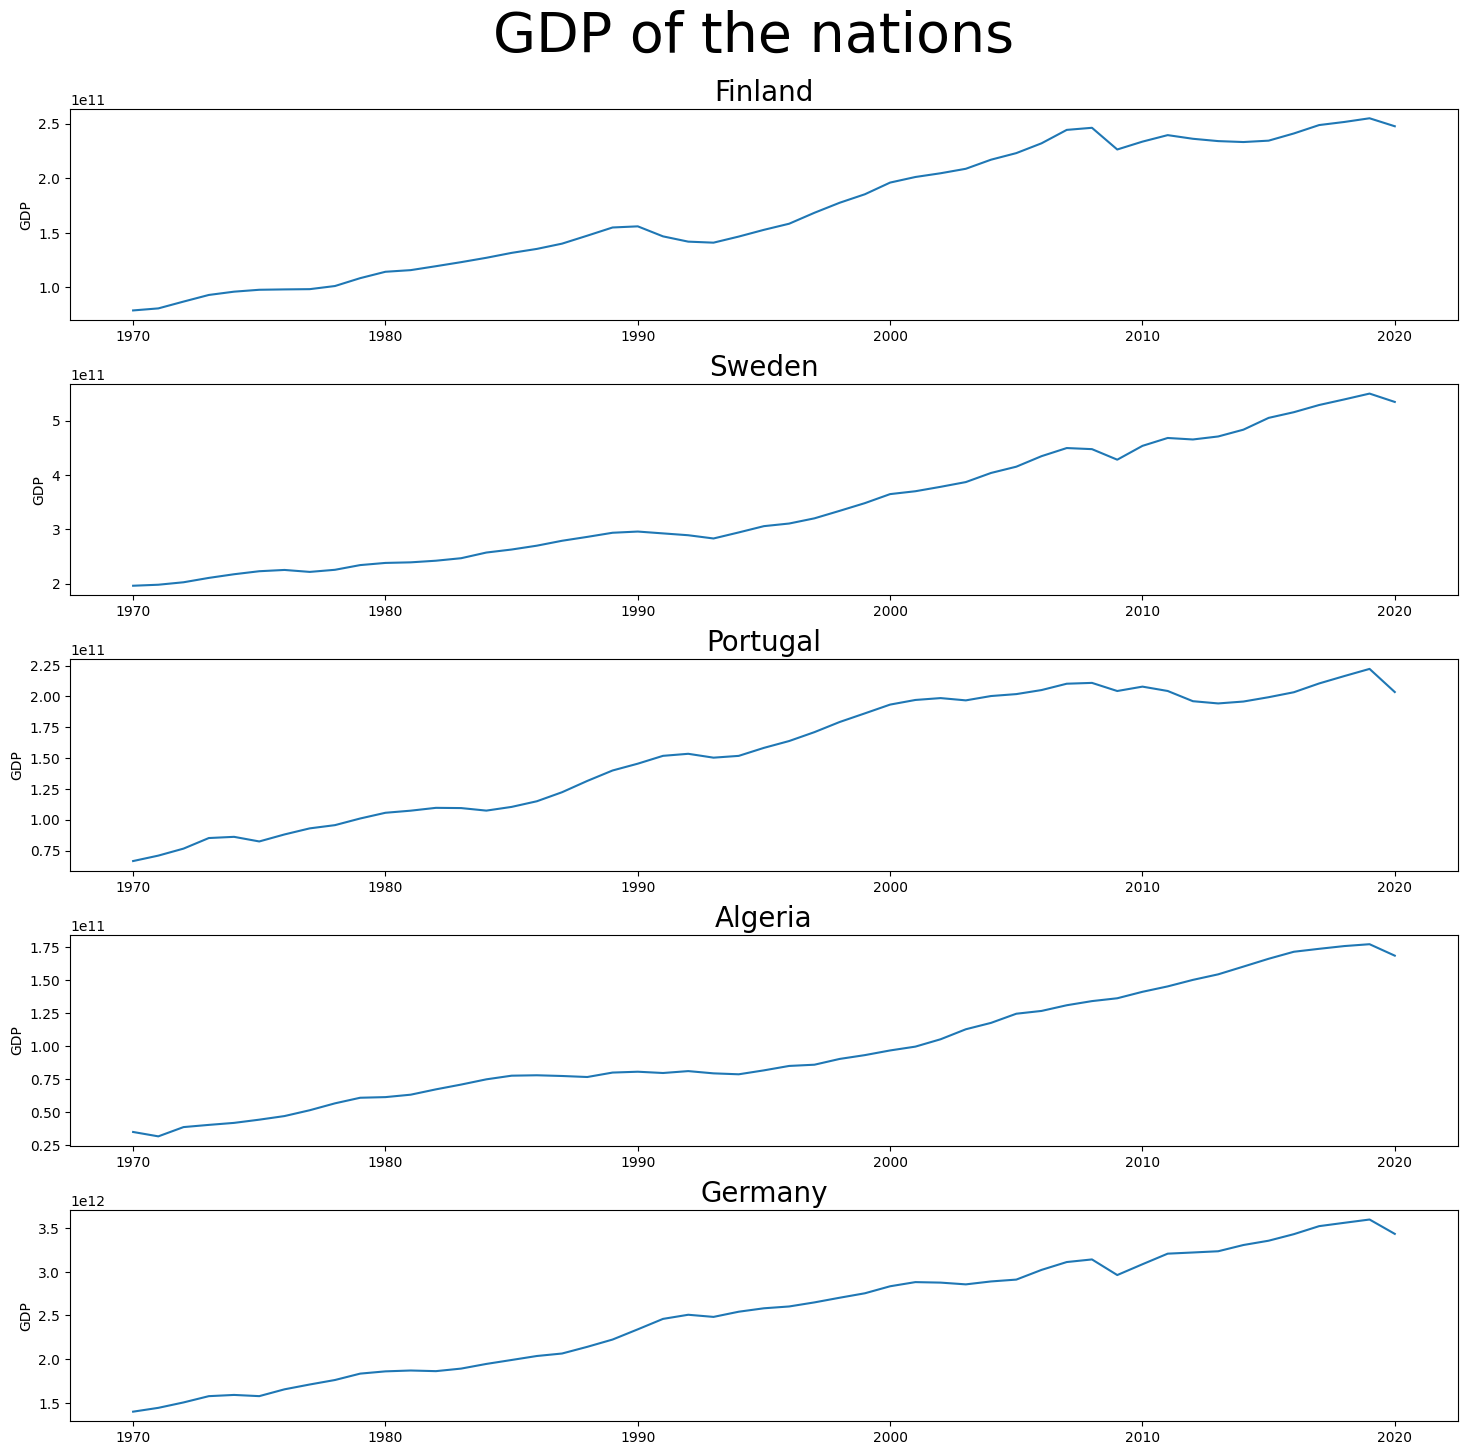

In [11]:
fig, ax = plt.subplots(5, 1, figsize = (15, 15))
plt.suptitle('GDP of the nations', fontsize = 40)
plt.tight_layout(pad = 2.5)

for idx, df in enumerate(df_list):
    sns.lineplot(df['GDP'], ax = ax[idx])
    ax[idx].set_title(nation_list[idx], fontsize = 20)

plt.show()

GDP has similar trend for all the states

## 5.2 Correlation heatmap

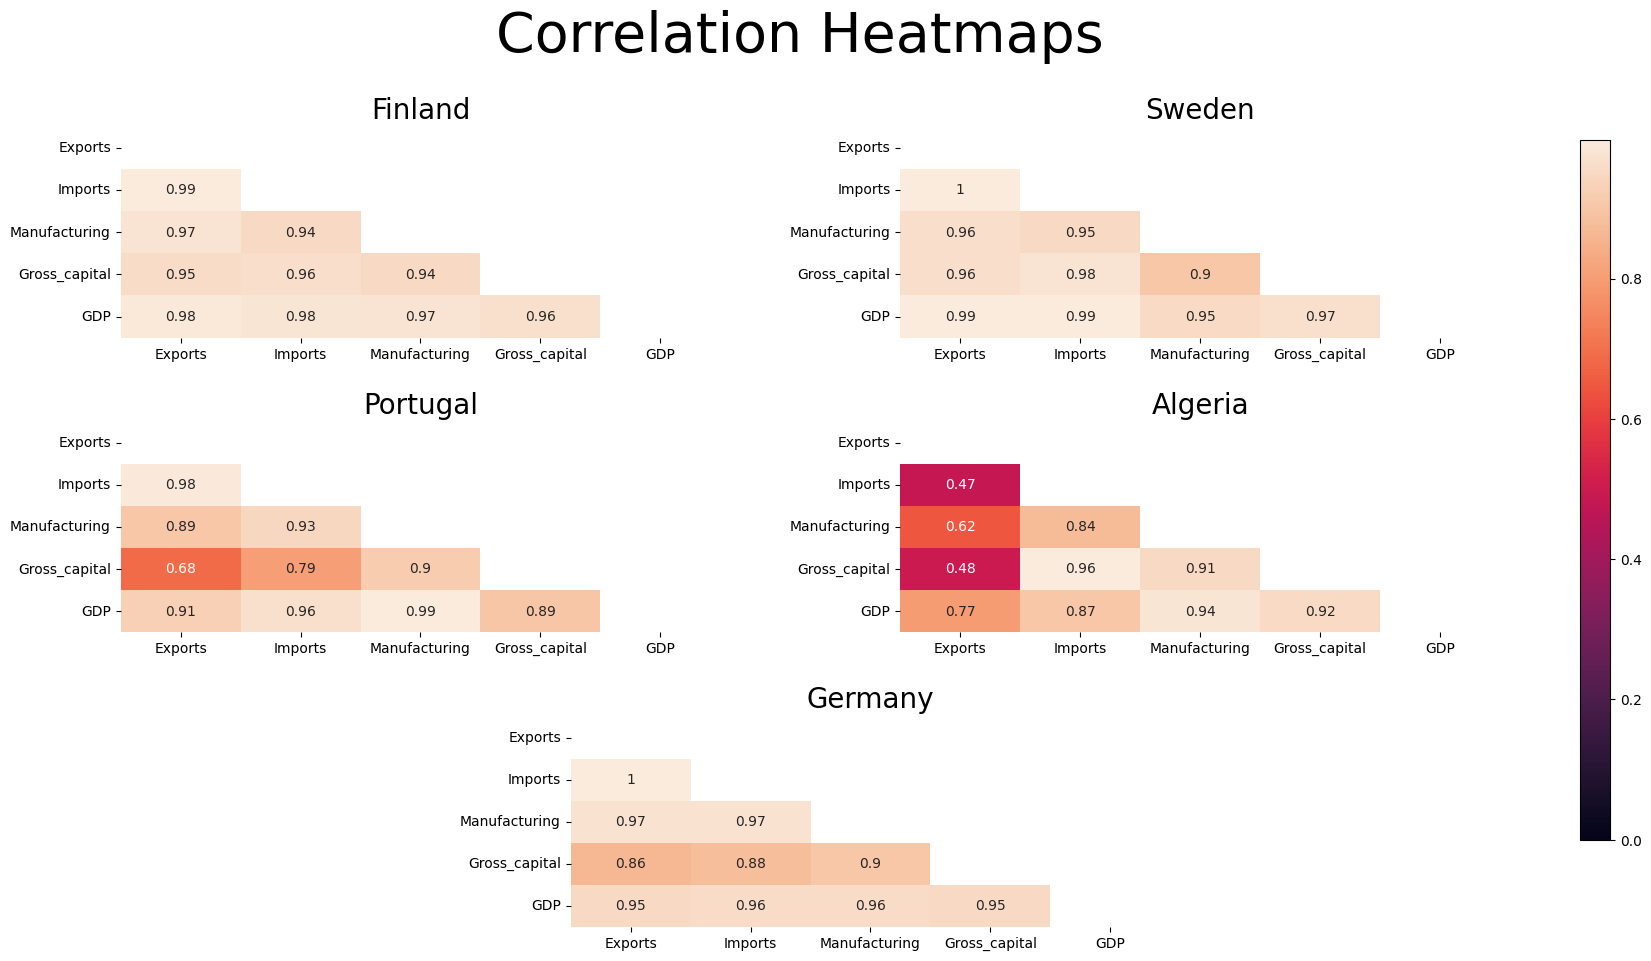

In [12]:
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
plt.suptitle('Correlation Heatmaps', fontsize = 40)
plt.tight_layout(pad = 2.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

matrix = np.triu(corr_1)
sns.heatmap(corr_1,annot = True, ax = ax[0][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_2)
sns.heatmap(corr_2, annot = True, ax = ax[0][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_3)
sns.heatmap(corr_3, annot = True, ax = ax[1][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_4)
sns.heatmap(corr_4, annot = True, ax = ax[1][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_5)
sns.heatmap(corr_5, annot = True, ax = ax[2][0], vmin = 0, cbar = False, mask = matrix)
fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.3, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(ax[2][0].collections[0], cax = cbar_ax)

plt.show()

Correlation is high between all the variables in all the states

## 5.3 Scatterplot 
Visualize the lowest correlation between 2 variables in all the states to prove the previous statement

Tuple of variables for every nation with lowest correlation:


0              1
Finland   Manufacturing  Gross_capital
Sweden    Manufacturing  Gross_capital
Portugal        Exports  Gross_capital
Algeria         Exports        Imports
Germany         Exports  Gross_capital

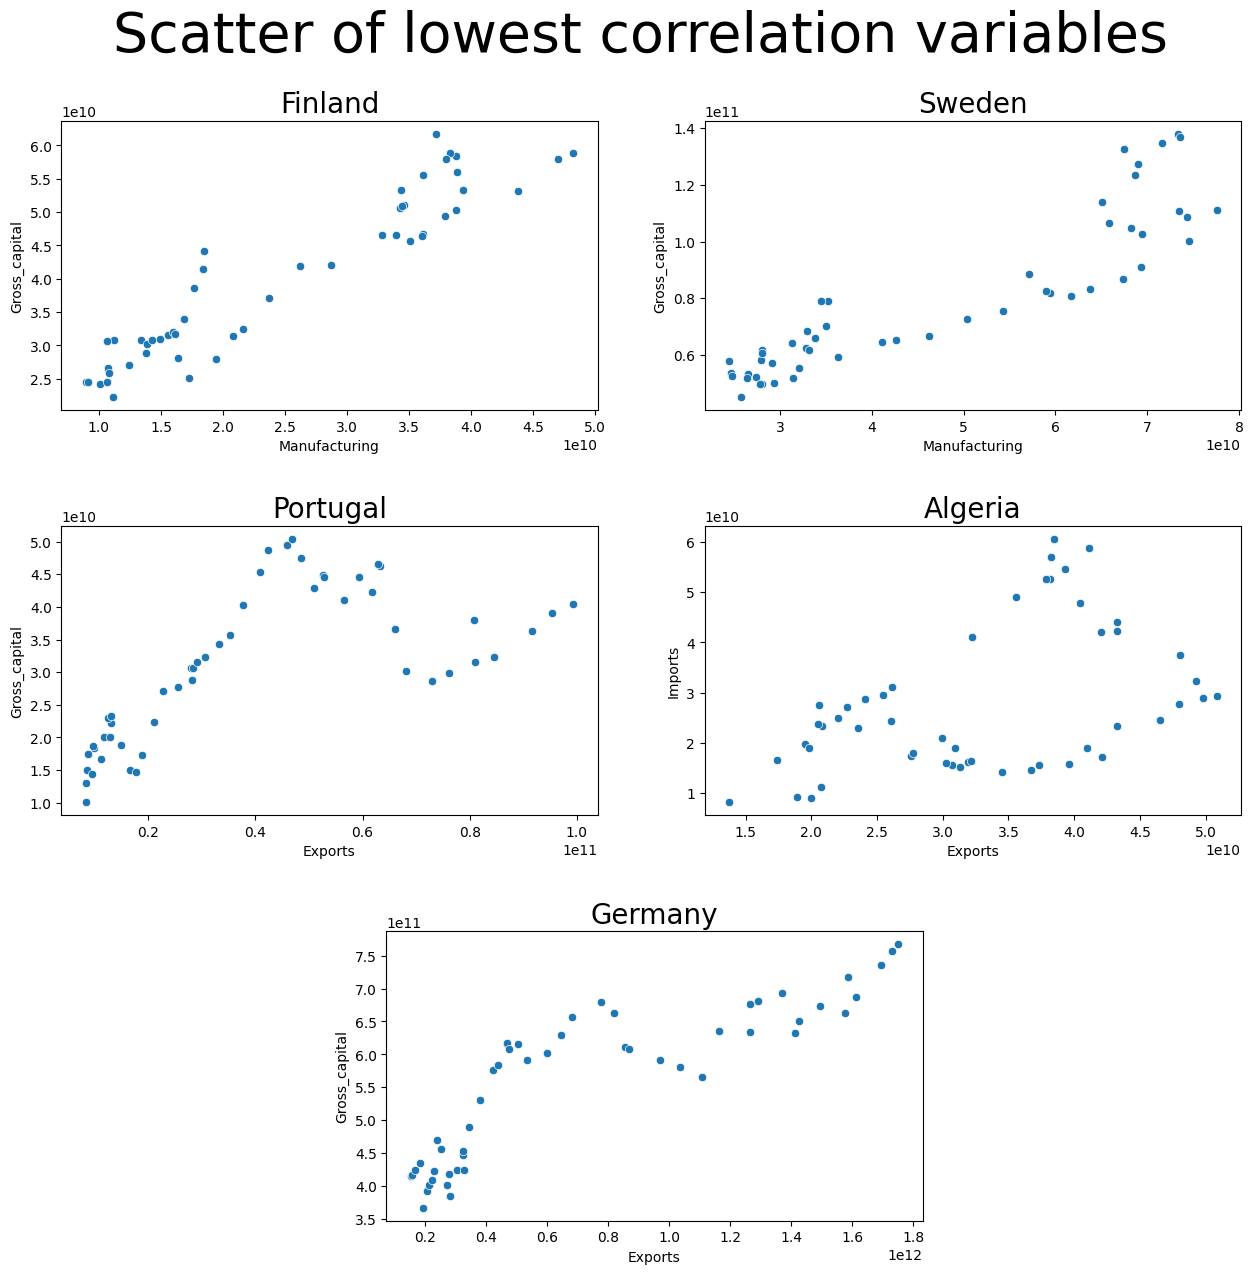

In [13]:
low_corr_list = []

fig, ax = plt.subplots(3, 2, figsize = (13, 13))
plt.suptitle('Scatter of lowest correlation variables', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

idx = f.lowest_corr_variable(corr_1)
low_corr_list.append(idx)
sns.scatterplot(x = df_1[idx[0]], y = df_1[idx[1]], ax = ax[0][0])
idx = f.lowest_corr_variable(corr_2)
low_corr_list.append(idx)
sns.scatterplot(x = df_2[idx[0]], y = df_2[idx[1]], ax = ax[0][1])
idx = f.lowest_corr_variable(corr_3)
low_corr_list.append(idx)
sns.scatterplot(x = df_3[idx[0]], y = df_3[idx[1]], ax = ax[1][0])
idx = f.lowest_corr_variable(corr_4)
low_corr_list.append(idx)
sns.scatterplot(x = df_4[idx[0]], y = df_4[idx[1]], ax = ax[1][1])
idx = f.lowest_corr_variable(corr_5)
low_corr_list.append(idx)
sns.scatterplot(x = df_5[idx[0]], y = df_5[idx[1]], ax = ax[2][0])
fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.25, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)

print('Tuple of variables for every nation with lowest correlation:')
display(pd.DataFrame(low_corr_list, index = nation_list))

plt.show()

## 5.4 Lag-plot

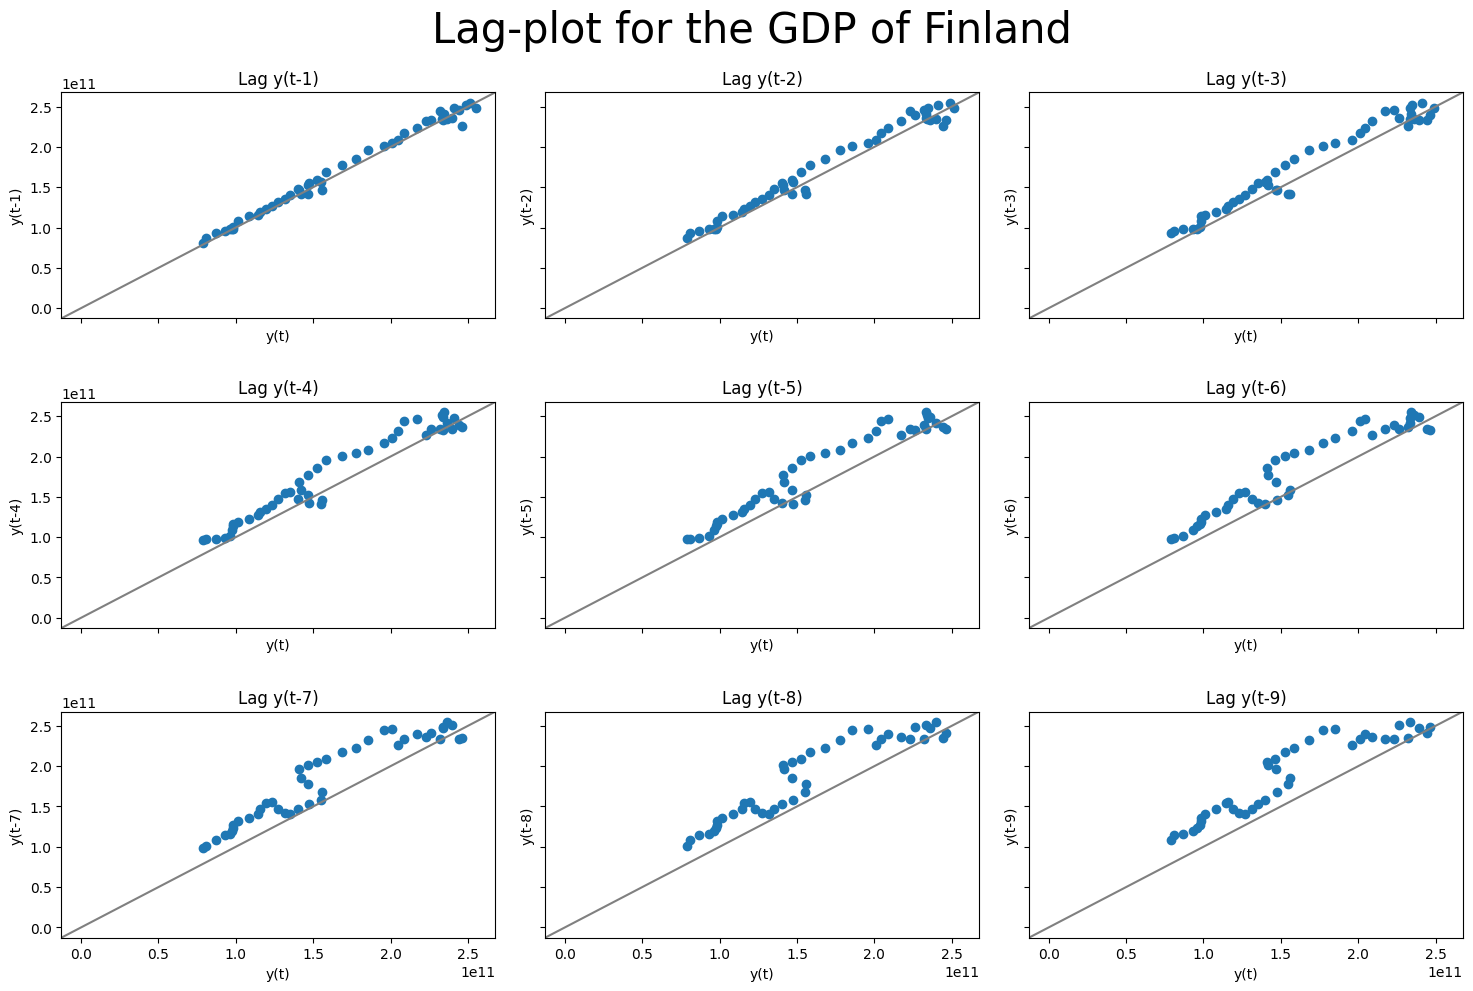

In [14]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(15,10))
fig.suptitle(f'Lag-plot for the GDP of {nation_list[0]}', fontsize = 30)
plt.tight_layout(pad = 2, h_pad = 5)

for i, ax in enumerate(axes.flatten()[:9]):
    pd.plotting.lag_plot(df_1['GDP'], lag = i+1, ax = ax)
    ax.set_xlabel('y(t)')
    ax.set_ylabel('y(t-'+str(i+1)+')')
    ax.set_title(f'Lag y(t-{str(i+1)})')
    pt = (350, 350)
    ax.axline(pt, slope=1, color='gray')



## 5.5 ACF and PACF of GDP

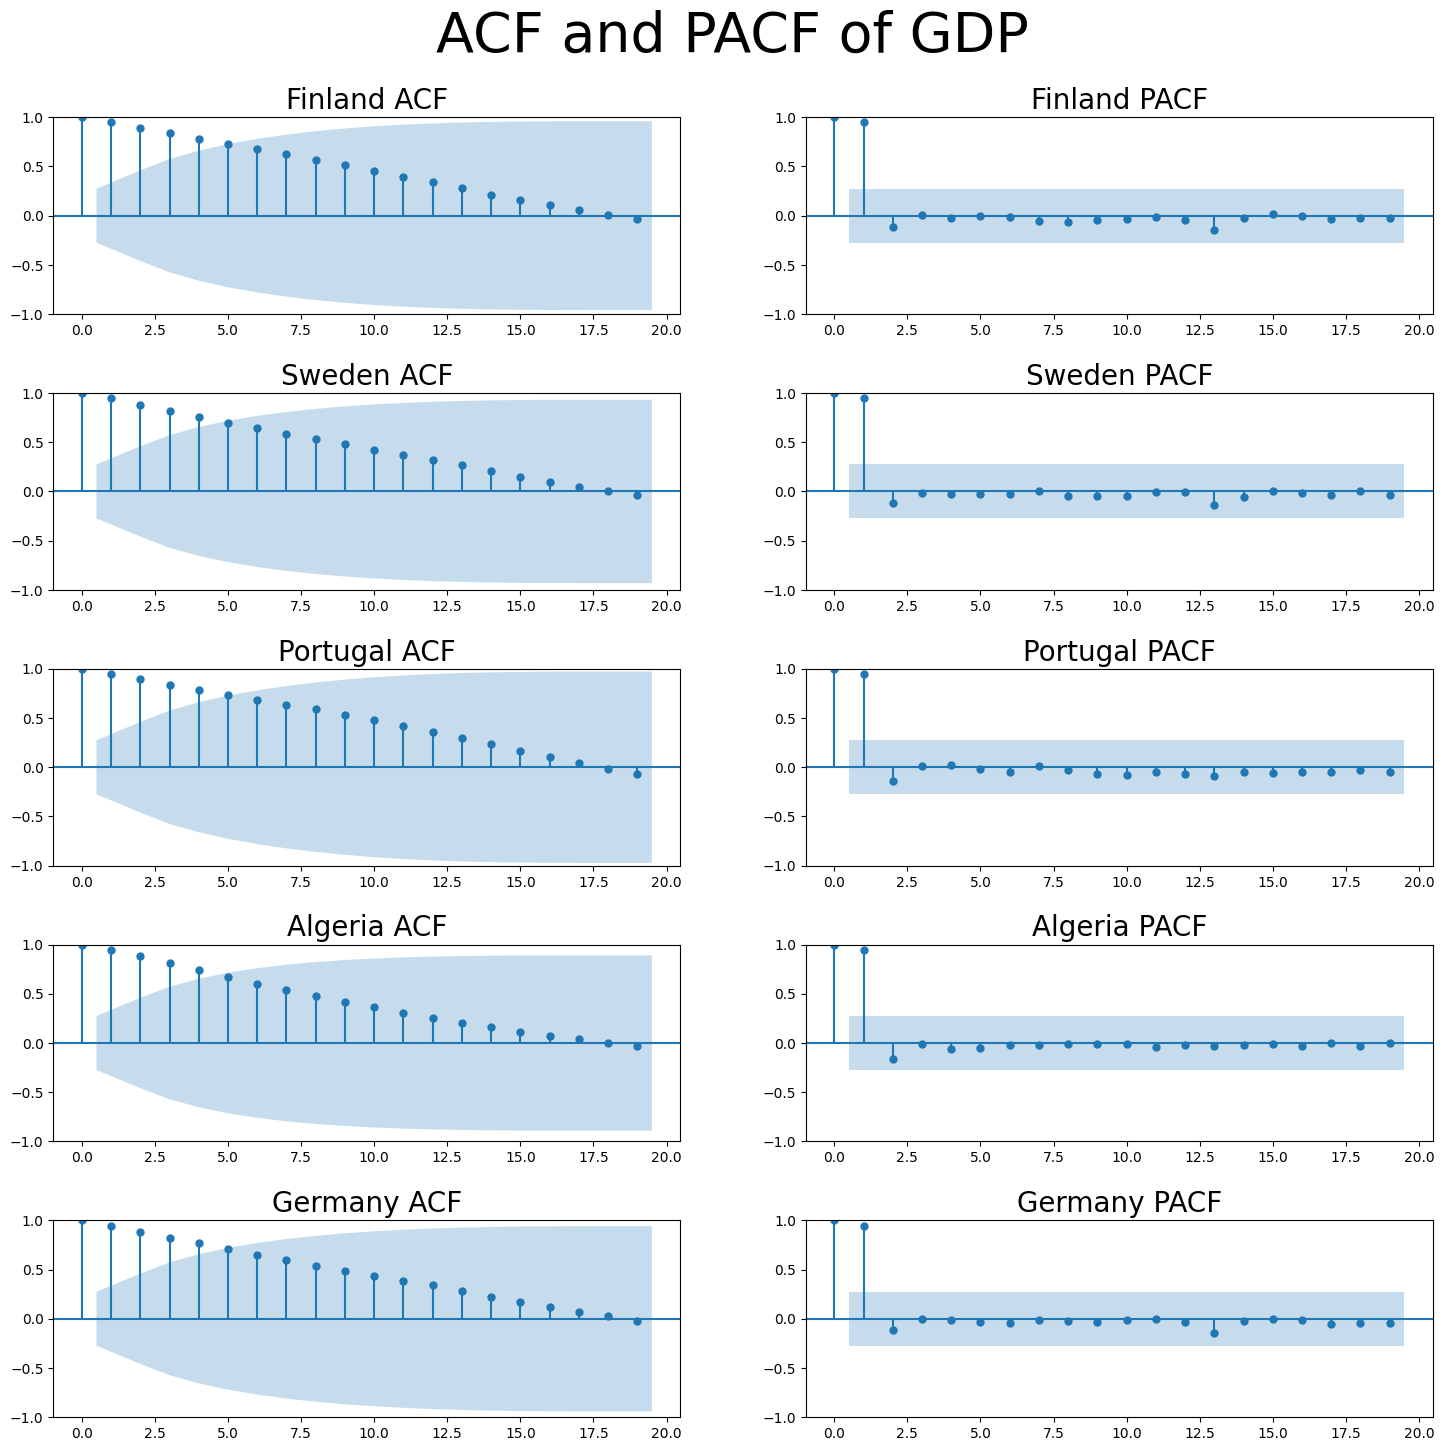

In [15]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))
plt.suptitle('ACF and PACF of GDP', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

for idx, df in enumerate(df_list):
    plot_acf(df['GDP'], lags = 19, ax = ax[idx][0])
    ax[idx][0].set_title(f'{nation_list[idx]} ACF', fontsize = 20)
    plot_pacf(df['GDP'], lags = 19, ax = ax[idx][1])
    ax[idx][1].set_title(f'{nation_list[idx]} PACF', fontsize = 20)

# 6. Split data in train and test 

In [16]:
df_train_test = {}

for idx, df in enumerate(df_list):
    df_train_test[nation_list[idx]] = f.train_test_split(df)

# 7. Frequency analysis

## 7.1 Fast Fourier Transform

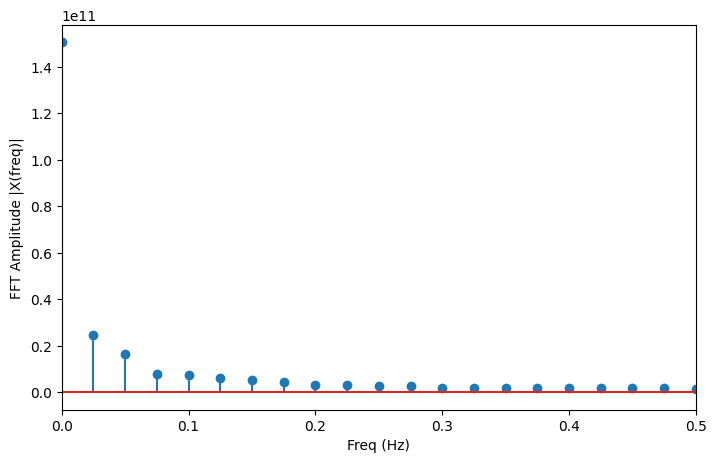

In [48]:
X = fft(df_train_test[nation_list[0]][0]['GDP'])
N = len(X)
Fs = 1
freq_step = Fs/N;
freq_vec = np.arange(0, Fs, freq_step)

plt.figure(figsize = (18, 5))
plt.subplot(121)

plt.stem(freq_vec, np.abs(X)/N)
plt.xlim(0, 0.5)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

## 7.2 Power-spectral density

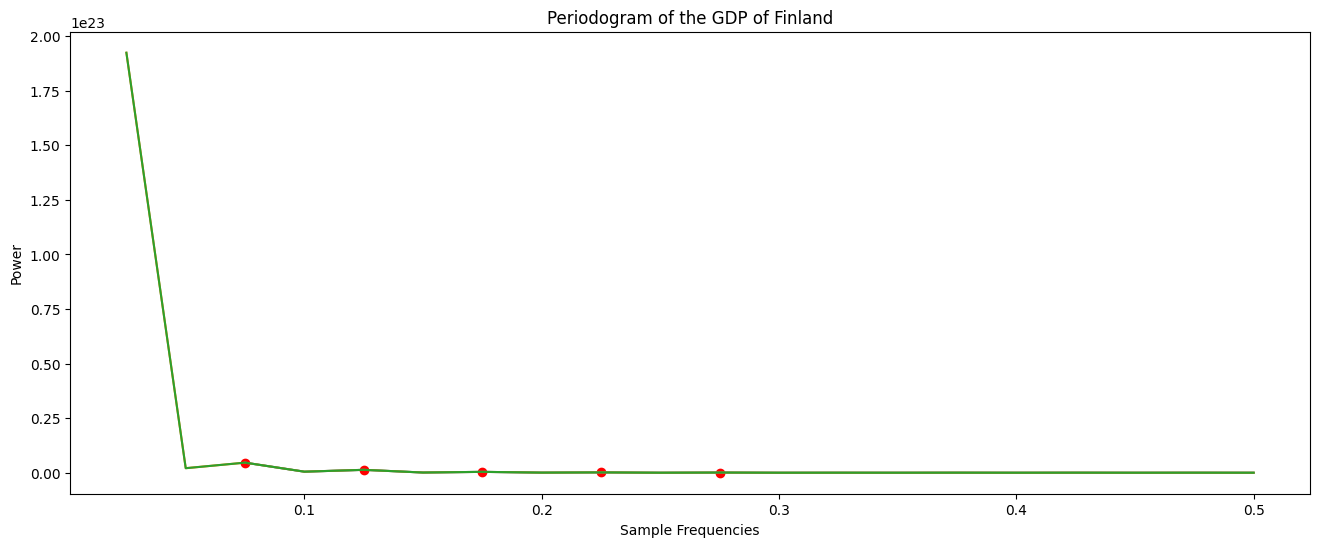

Frequency       Density     Period
0      0.075  4.616394e+21  13.333333
1      0.125  1.323946e+21   8.000000
2      0.175  3.951268e+20   5.714286
3      0.225  1.510196e+20   4.444444
4      0.275  8.303045e+19   3.636364

----------------------------------------------


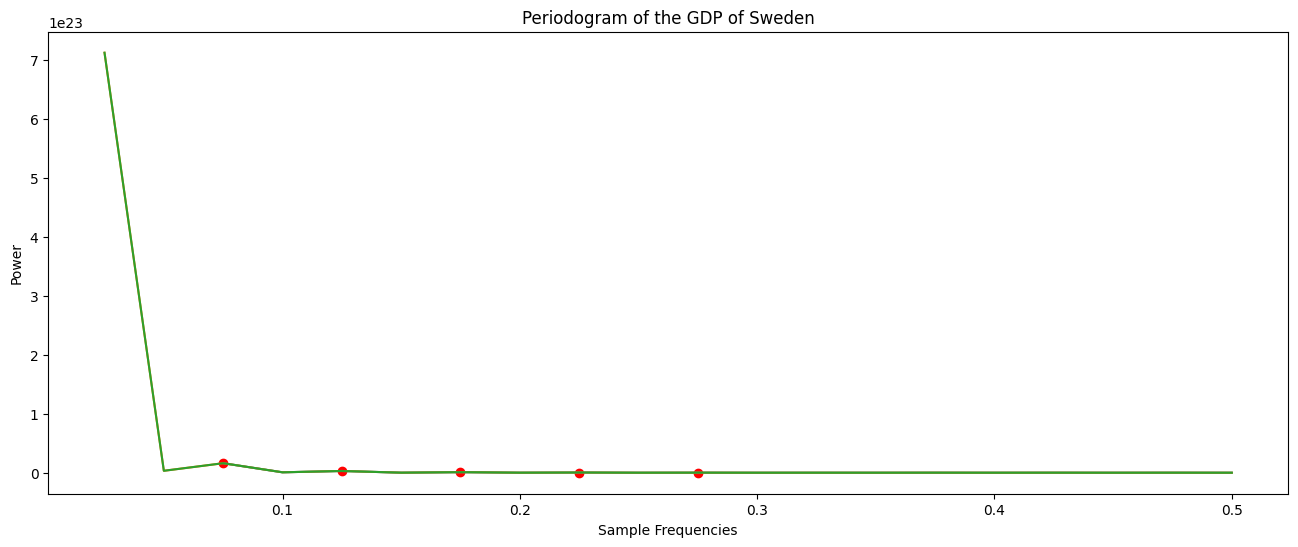

Frequency       Density     Period
0      0.075  1.611147e+22  13.333333
1      0.125  2.950124e+21   8.000000
2      0.175  9.493779e+20   5.714286
3      0.225  3.601053e+20   4.444444
4      0.275  1.238282e+20   3.636364

----------------------------------------------


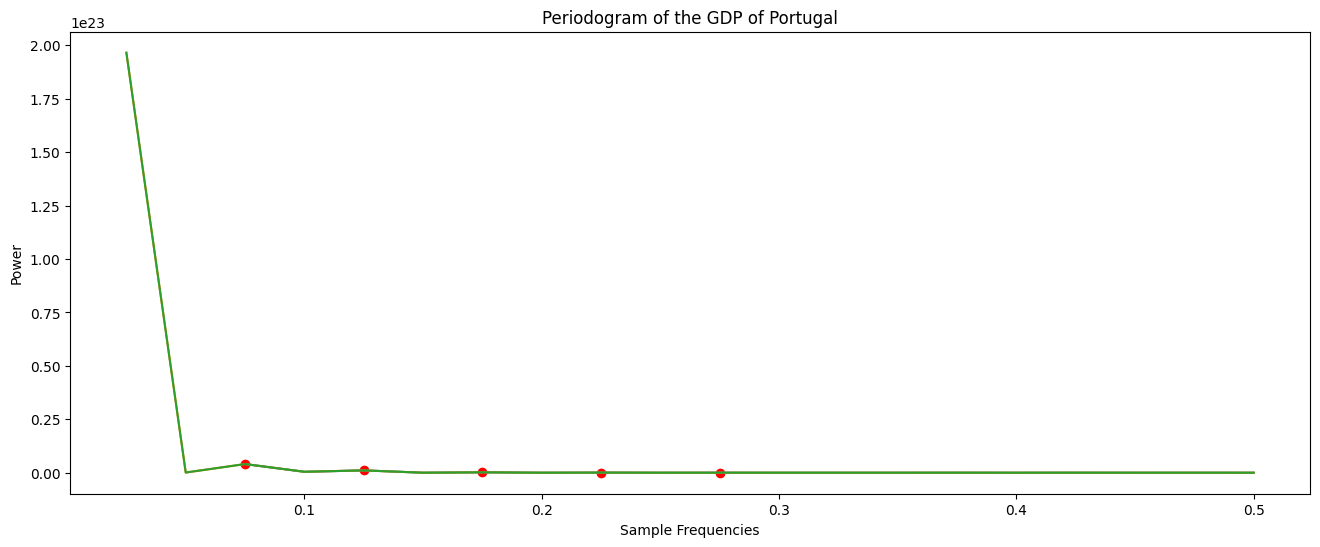

Frequency       Density     Period
0      0.075  4.052807e+21  13.333333
1      0.125  1.089262e+21   8.000000
2      0.175  1.849057e+20   5.714286
3      0.225  6.367428e+19   4.444444
4      0.275  1.857446e+19   3.636364

----------------------------------------------


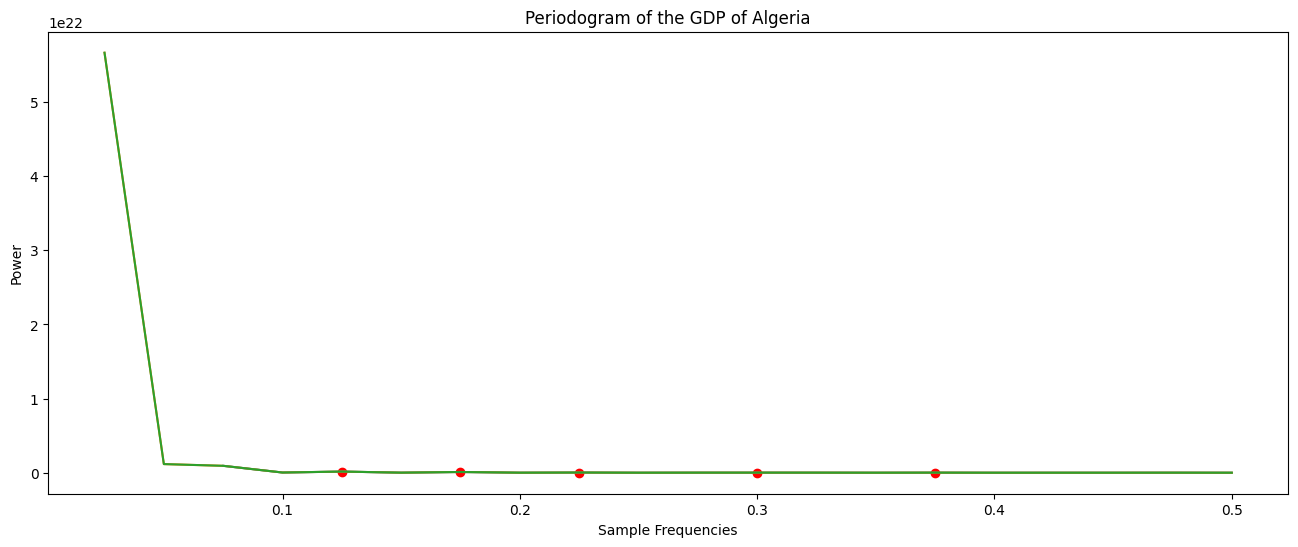

Frequency       Density    Period
0      0.125  1.555459e+20  8.000000
1      0.175  9.987653e+19  5.714286
2      0.225  2.663023e+19  4.444444
3      0.300  1.271929e+19  3.333333
4      0.375  1.233406e+19  2.666667

----------------------------------------------


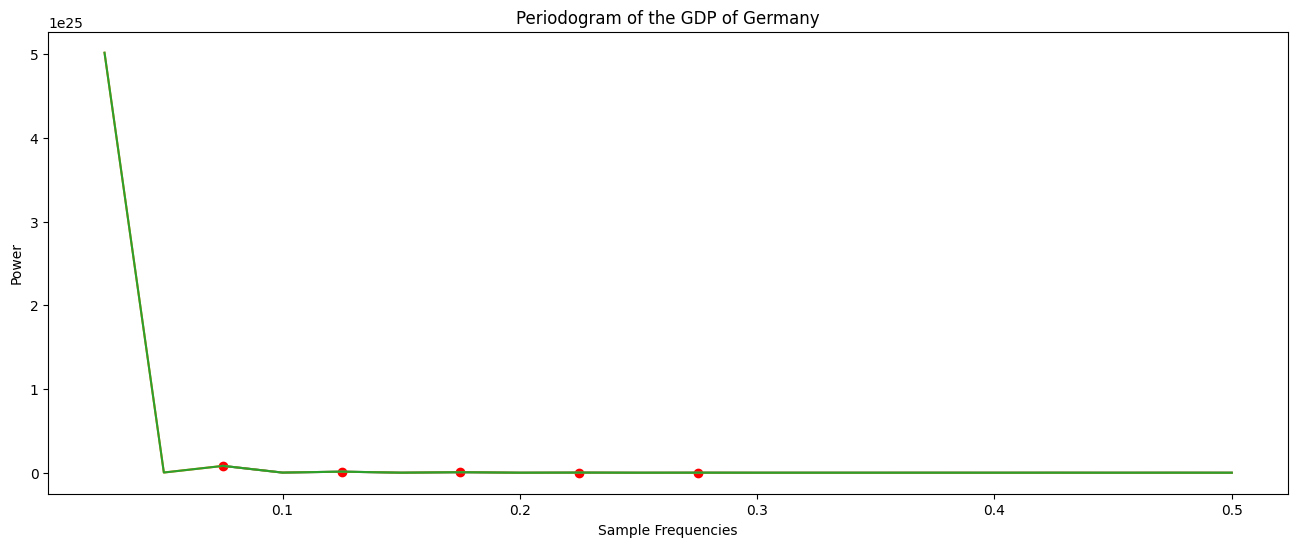

Frequency       Density     Period
0      0.075  8.167657e+23  13.333333
1      0.125  1.284873e+23   8.000000
2      0.175  6.251032e+22   5.714286
3      0.225  1.675840e+22   4.444444
4      0.275  6.289421e+21   3.636364

----------------------------------------------


In [18]:
seasons_list = []

for nation in nation_list:
    top_season = f.spd(nation, df_train_test, Fs)
    seasons_list.append(top_season)
    print('----------------------------------------------')

seasons_list = [round(x) for x in seasons_list]

# 8. Seasonal decompose

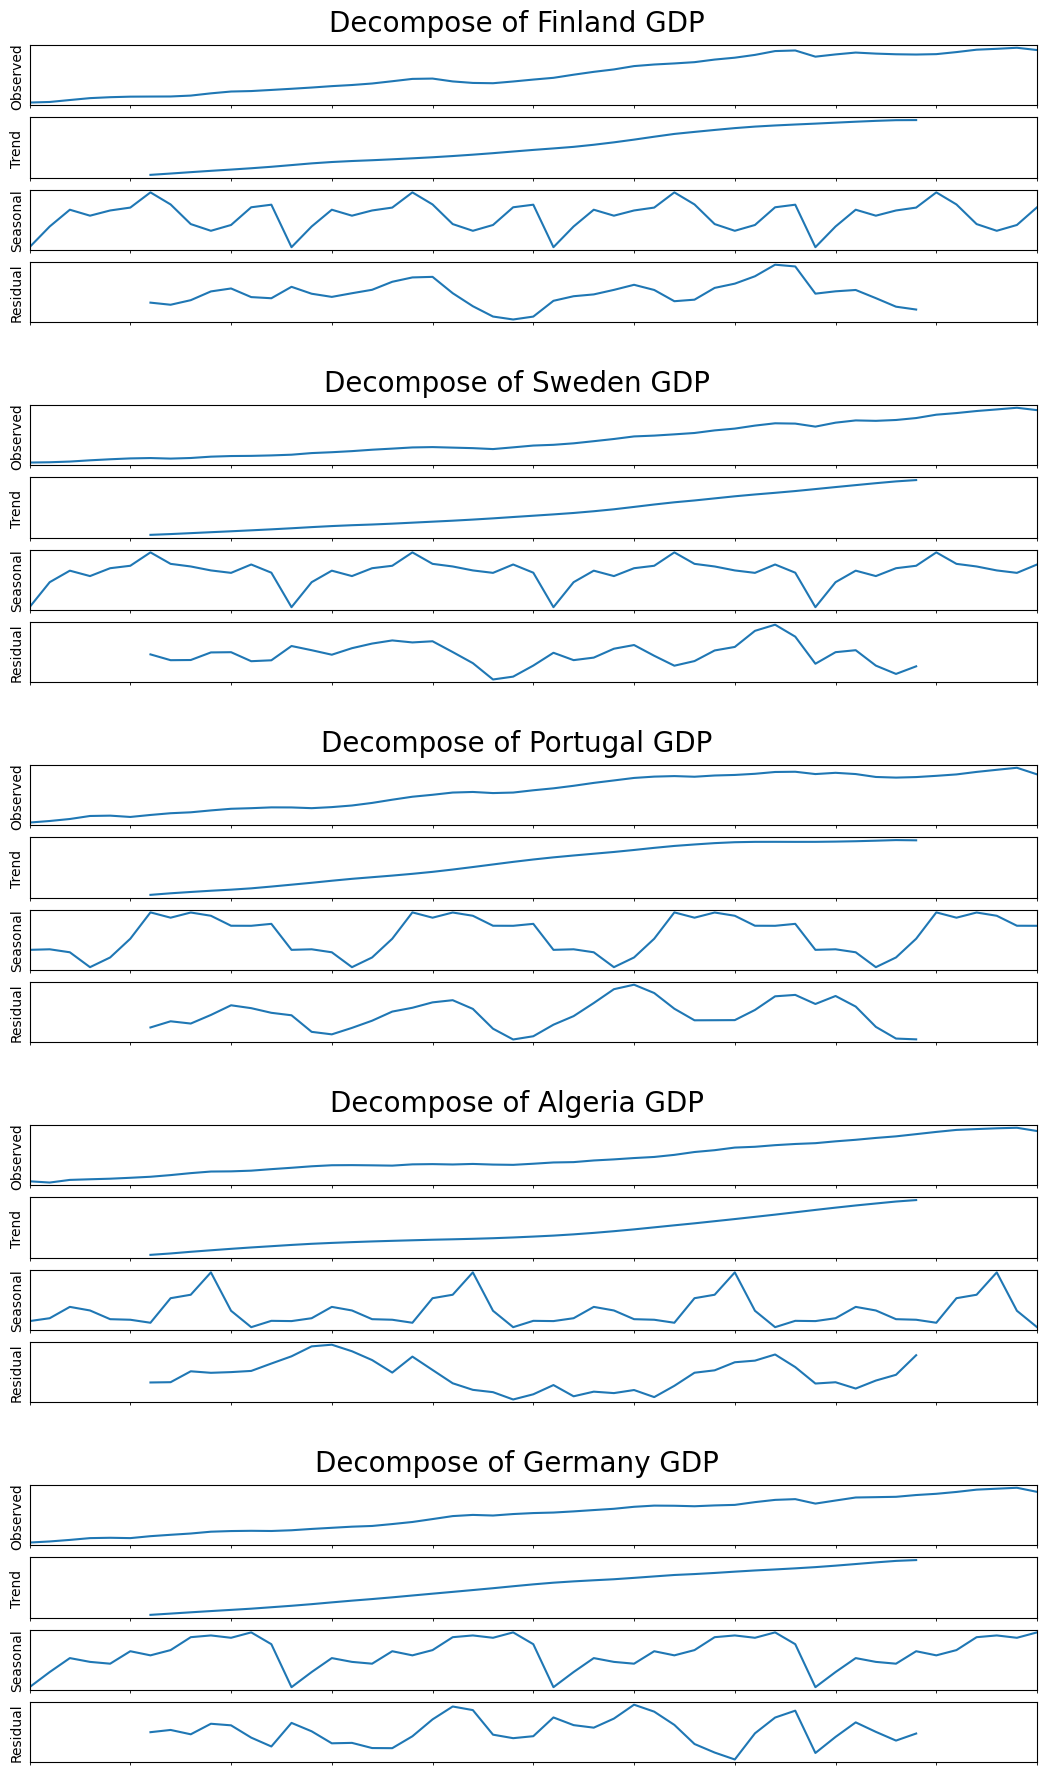

In [19]:
fig = plt.figure(figsize = (13, 18))

subfigs = fig.subfigures(5, 1)

for outerind, subfig in enumerate(subfigs.flat):
    decompose_data_add = seasonal_decompose(df_list[outerind]['GDP'], model = 'additive', period = seasons_list[idx])
    subfig.suptitle(f'Decompose of {nation_list[outerind]} GDP', fontsize = 20)
    axs = subfig.subplots(4, 1)
    f.plotseasonal(decompose_data_add, axs[:])
    for innerind, ax in enumerate(axs.flat):
        ax.set_xticks([])
        ax.set_yticks([])
 
plt.show()

# 9. Stationarity check

## 9.1 Visual stationarity

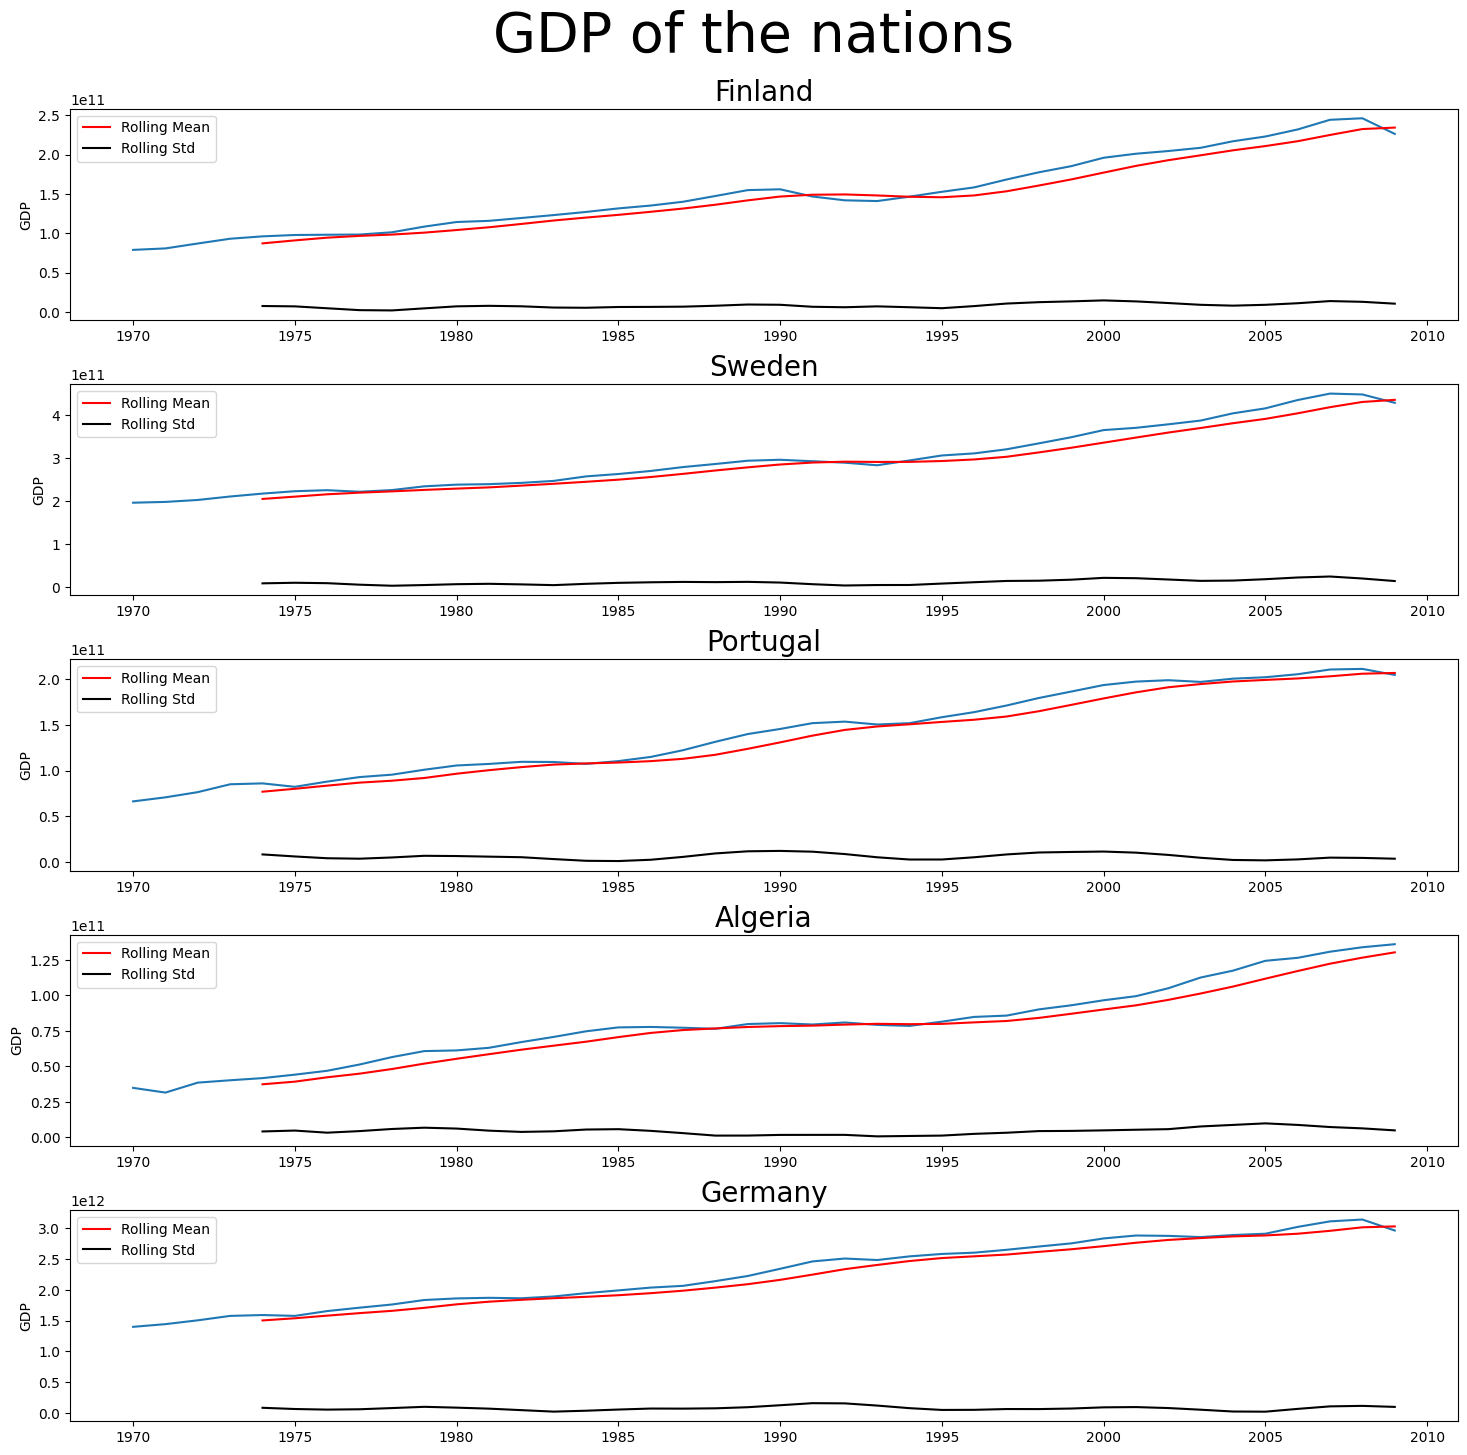

In [20]:
f.roll_mean_std_plot(df_train_test, nation_list, 5)

## 9.2 Statistics stationarity

In [21]:
f.check_stationarity(df_list, df_train_test, nation_list)

ADF  P-value for ADF ADF stationarity      KPSS  \
Finland  -0.466427         0.898403               No  0.871910   
Sweden   -1.236686         0.657619               No  0.865320   
Portugal -1.794698         0.383097               No  0.896777   
Algeria  -0.470613         0.897625               No  0.862571   
Germany  -1.036319         0.739788               No  0.901137   

          P-value for KPSS KPSS stationarity  
Finland               0.01                No  
Sweden                0.01                No  
Portugal              0.01                No  
Algeria               0.01                No  
Germany               0.01                No

## 9.3 Achieving stationarity

In [22]:
df_train_test_log_dif = {}

for idx, nation in enumerate(nation_list):
    df_train_test_log_dif[nation] = f.difference(df_train_test, 1, nation)

print('Stationarity check after first order differencing')
stationarity_df =  f.check_stationarity(df_list, df_train_test_log_dif, nation_list)
stationarity_df

Stationarity check after first order differencing


ADF  P-value for ADF ADF stationarity      KPSS  \
Finland  -3.358618         0.012453              Yes  0.076583   
Sweden   -2.878037         0.047962              Yes  0.171736   
Portugal -3.433653         0.009864              Yes  0.112797   
Algeria  -3.591460         0.005926              Yes  0.224629   
Germany  -3.564720         0.006472              Yes  0.153294   

          P-value for KPSS KPSS stationarity  
Finland                0.1               Yes  
Sweden                 0.1               Yes  
Portugal               0.1               Yes  
Algeria                0.1               Yes  
Germany                0.1               Yes

1. ADF AND KPSS indicate stationarity --> do nothing
2. ADF indicates stationarity and KPSS no --> first order differencing
3. KPSS indicates stationarity and ADF no --> detrend with seasonal_decompose
4. Both indicate non-stationarity --> first order differencing

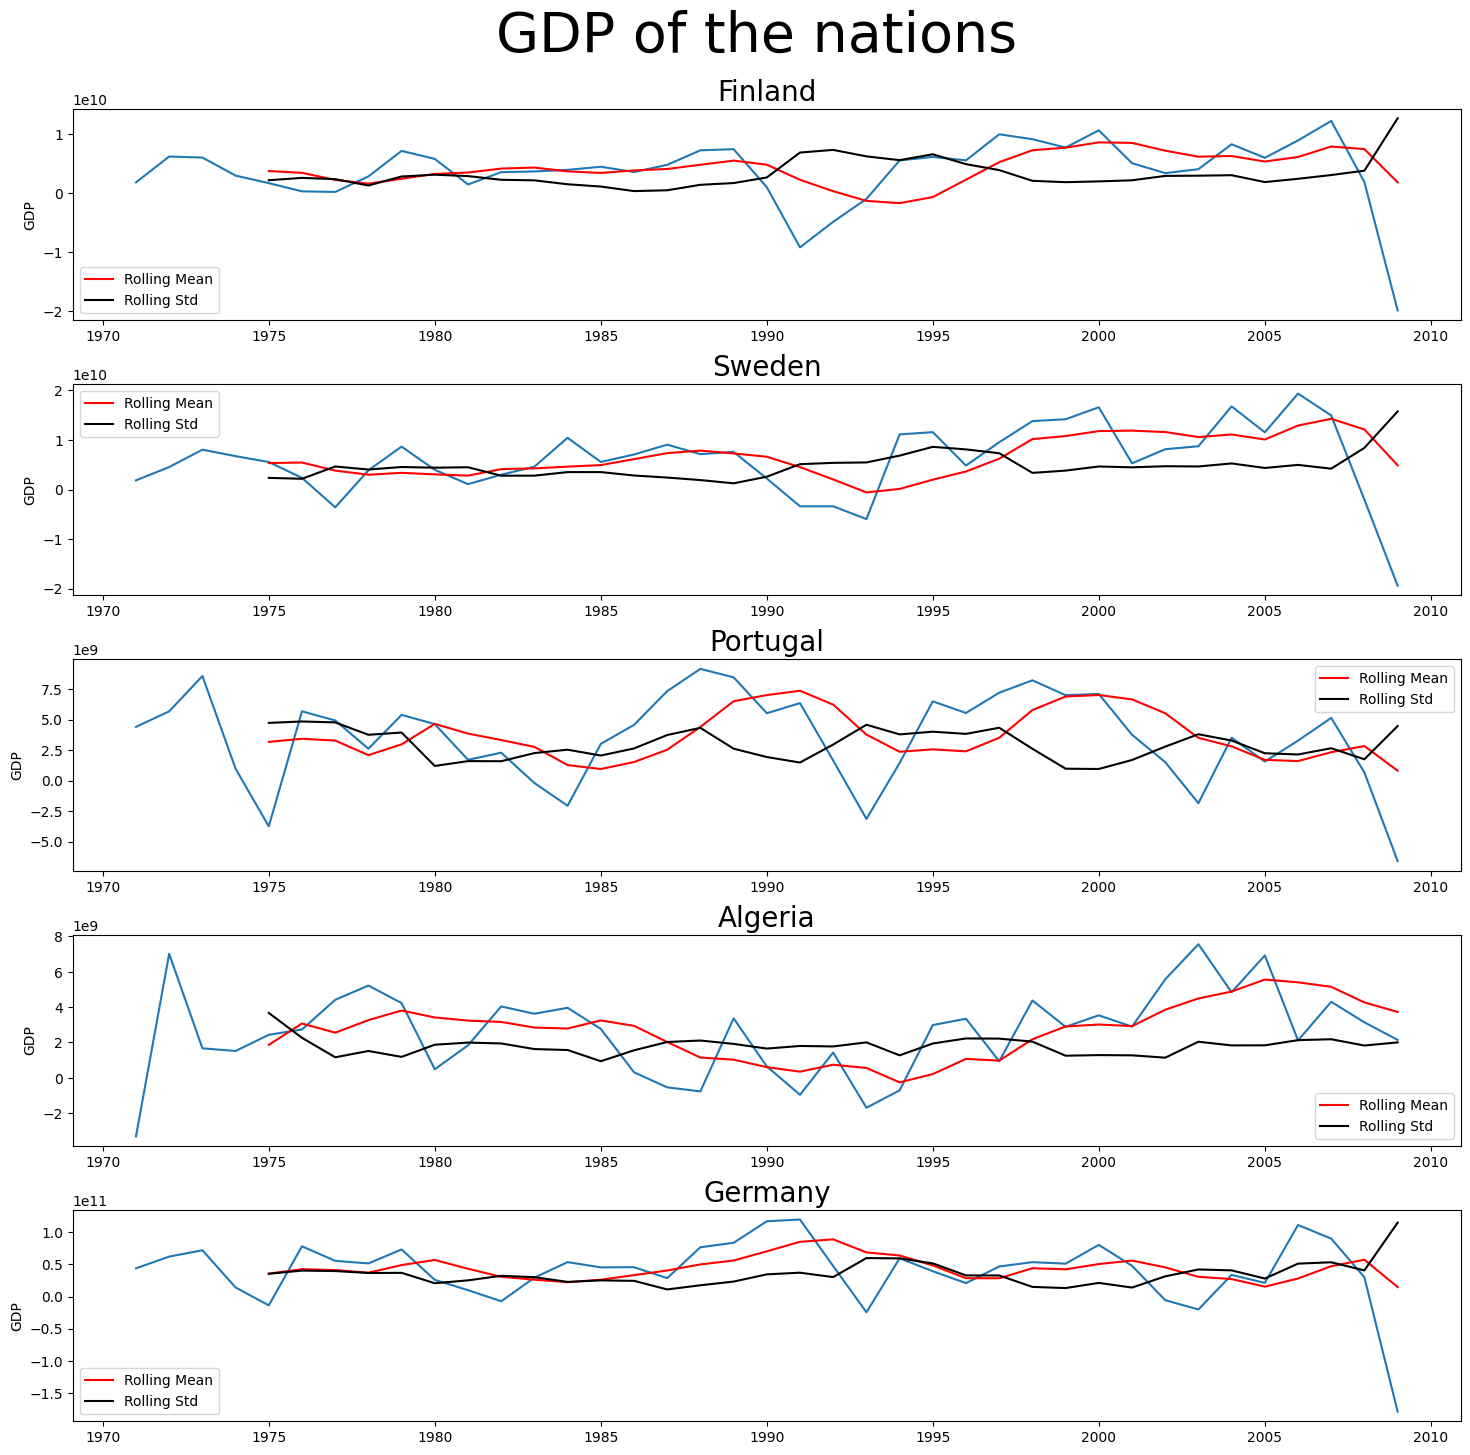

In [23]:
f.roll_mean_std_plot(df_train_test_log_dif, nation_list, 5)

## 9.4 ACF and PACF on differenced data

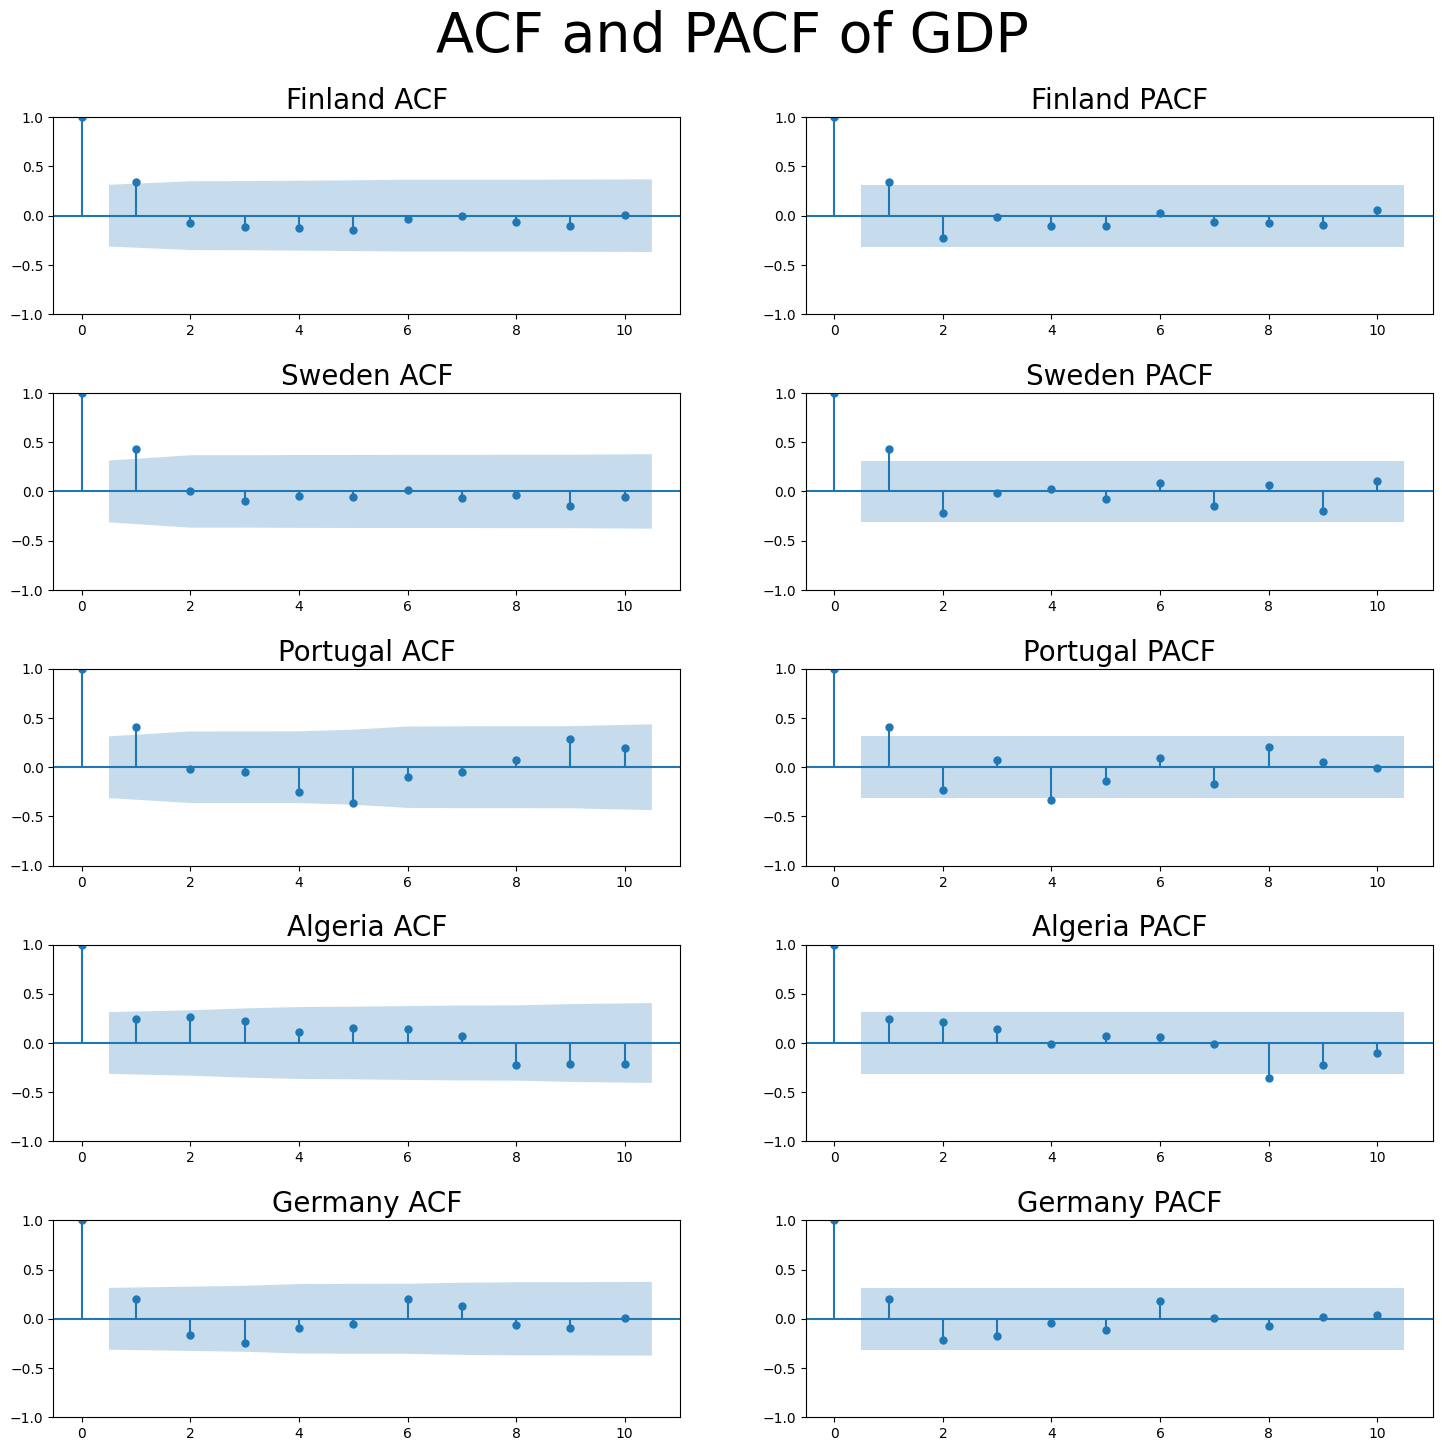

In [24]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))
plt.suptitle('ACF and PACF of GDP', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

for idx, df in enumerate(df_list):
    plot_acf(df_train_test_log_dif[nation_list[idx]][0]['GDP'], lags = 10, ax = ax[idx][0])
    ax[idx][0].set_title(f'{nation_list[idx]} ACF', fontsize = 20)
    plot_pacf(df_train_test_log_dif[nation_list[idx]][0]['GDP'], lags = 10, ax = ax[idx][1])
    ax[idx][1].set_title(f'{nation_list[idx]} PACF', fontsize = 20)

# 10. Models

## 10.0 Metrics

In [25]:
metrics_list_of_df = f.create_metrics_df()

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


Empty DataFrame
Columns: [Model_name, AIC, MAE, RMSE, MAPE]
Index: []

Sweden


Empty DataFrame
Columns: [Model_name, AIC, MAE, RMSE, MAPE]
Index: []

Portugal


Empty DataFrame
Columns: [Model_name, AIC, MAE, RMSE, MAPE]
Index: []

Algeria


Empty DataFrame
Columns: [Model_name, AIC, MAE, RMSE, MAPE]
Index: []

Germany


Empty DataFrame
Columns: [Model_name, AIC, MAE, RMSE, MAPE]
Index: []

## 10.1 Arimax

### 10.1.1 Model identification/estimation

In [49]:
nation_list

['Finland', 'Sweden', 'Portugal', 'Algeria', 'Germany']

In [26]:
order_list, arima_model_list = f.arima_order(nation_list, df_train_test)

Finland
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1772.369, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1777.001, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1775.504, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1914.346, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1772.515, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.406 seconds
Sweden
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1813.710, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1815.825, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1817.019, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1947.080, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1812.924, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1813.928, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1815.408, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] interc

In [27]:
order_list

[(0, 1, 0), (1, 1, 1), (1, 1, 1), (0, 1, 0), (1, 1, 1)]

### 10.1.2 Model diagnostics

Summary and diagnostics for Finland's arima model

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   40
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -952.173
Date:                Tue, 21 Jan 2025   AIC                           1914.346
Time:                        11:17:20   BIC                           1922.663
Sample:                    01-01-1970   HQIC                          1917.330
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Exports          -0.2753     23.369     -0.012      0.991     -46.078      45.527
Imports           0.8439     23.788      0.035      0.972     -45.780  

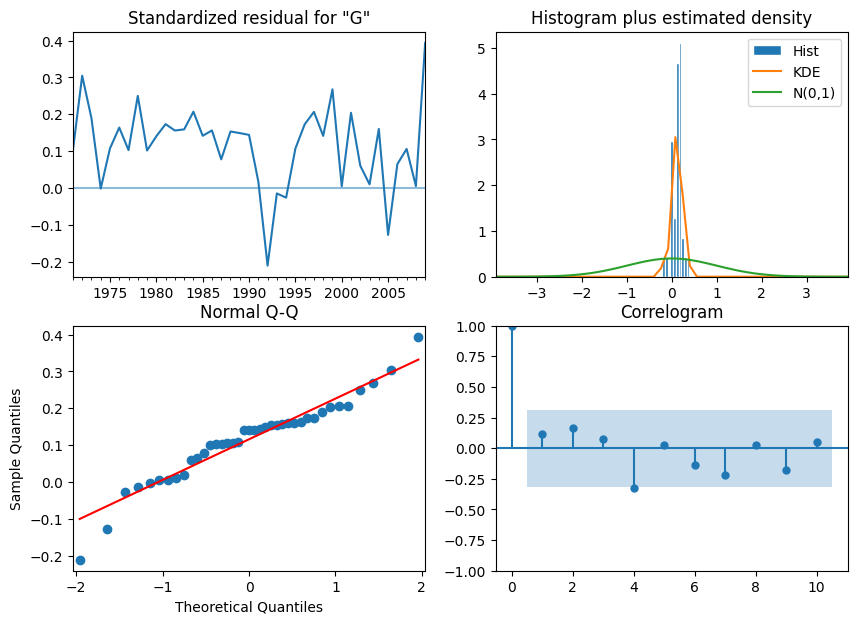

--------------------------------------
Summary and diagnostics for Sweden's arima model

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -900.154
Date:                Tue, 21 Jan 2025   AIC                           1814.309
Time:                        11:17:21   BIC                           1825.954
Sample:                    01-01-1970   HQIC                          1818.487
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Exports           0.7778      0.634      1.227      0.220      -0.464       2.020
Imports          -0.5403      0.6

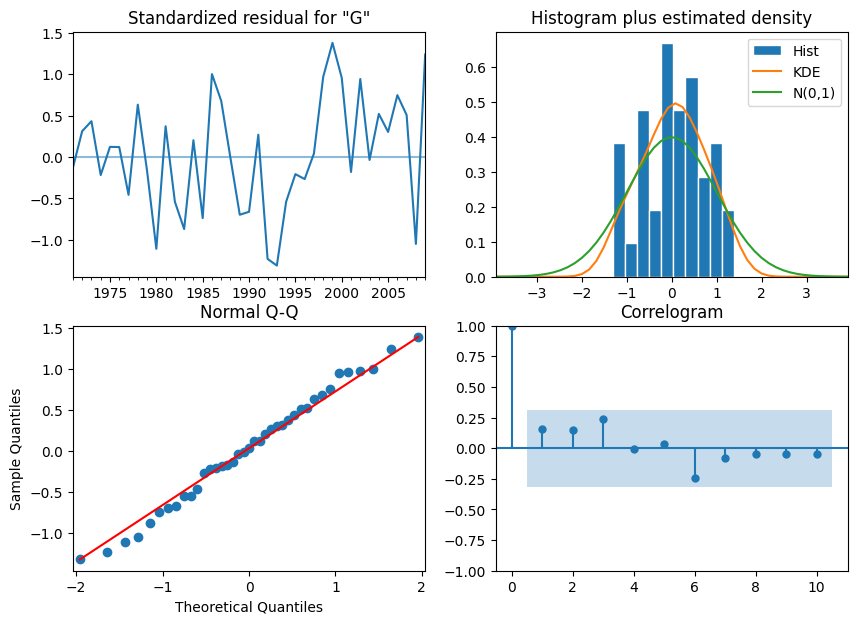

--------------------------------------
Summary and diagnostics for Portugal's arima model

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -884.862
Date:                Tue, 21 Jan 2025   AIC                           1783.725
Time:                        11:17:22   BIC                           1795.369
Sample:                    01-01-1970   HQIC                          1787.903
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Exports           0.0805      0.601      0.134      0.893      -1.097       1.258
Imports           0.3154      0

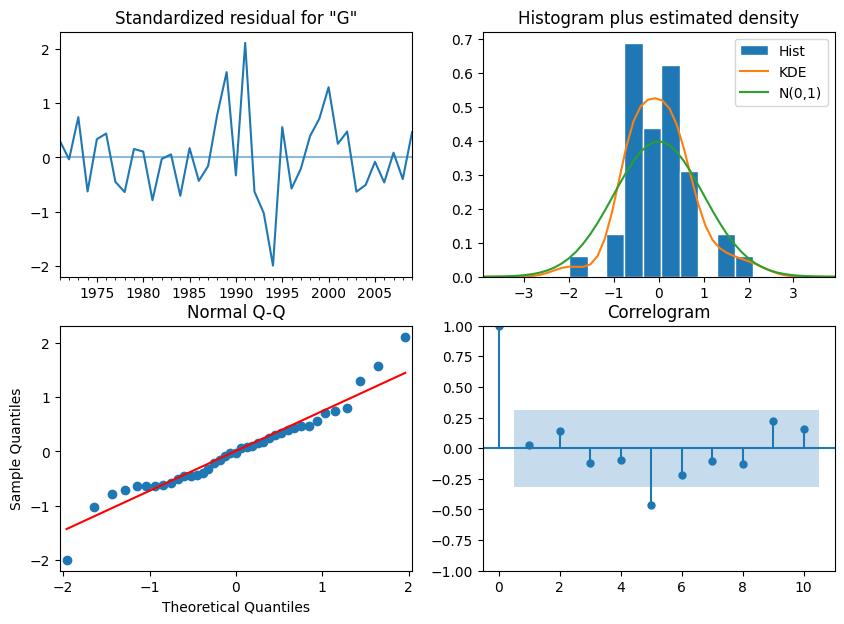

--------------------------------------
Summary and diagnostics for Algeria's arima model

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   40
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -932.706
Date:                Tue, 21 Jan 2025   AIC                           1875.411
Time:                        11:17:22   BIC                           1883.729
Sample:                    01-01-1970   HQIC                          1878.396
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Exports           0.9661      3.963      0.244      0.807      -6.801       8.733
Imports          -0.0196      7.

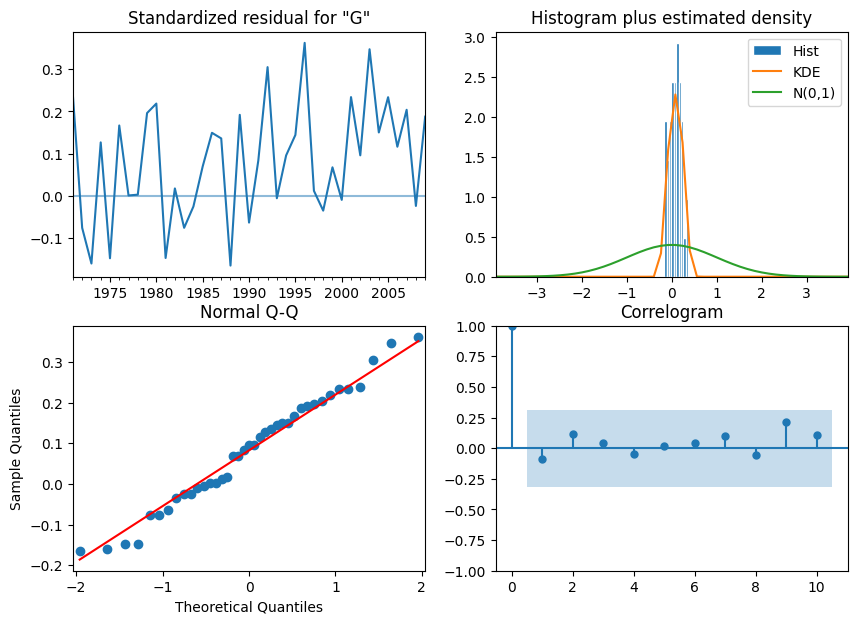

--------------------------------------
Summary and diagnostics for Germany's arima model

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -969.720
Date:                Tue, 21 Jan 2025   AIC                           1953.439
Time:                        11:17:23   BIC                           1965.084
Sample:                    01-01-1970   HQIC                          1957.618
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Exports           0.6544      0.276      2.370      0.018       0.113       1.196
Imports          -0.5559      0.

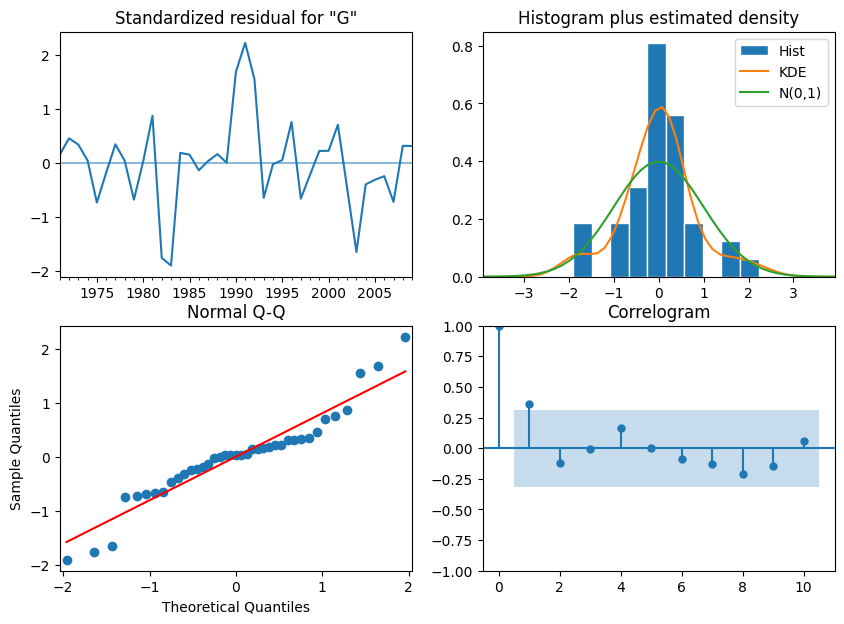

--------------------------------------


In [28]:
f.arima_diagnostics(arima_model_list, nation_list)

In [29]:
f.res_stats(arima_model_list, nation_list, df_train_test)

DW statistic for standardized residuals of Finland's model: 0.9192510016828903


lb_stat  lb_pvalue
1   0.000391   0.984234
2   0.215320   0.897933
3   0.251994   0.968789
4   0.389575   0.983321
5   0.390541   0.995586
6   0.391825   0.998917
7   0.412300   0.999708
8   0.493107   0.999873
9   0.511070   0.999967
10  0.512248   0.999993

JB p-value for standardized residuals of Finland's model: (useless, too few samples) 0.0
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Sweden's model: 1.0119092367195108


lb_stat  lb_pvalue
1   0.000210   0.988450
2   0.002248   0.998876
3   0.007063   0.999842
4   0.009671   0.999988
5   0.009676   1.000000
6   0.010064   1.000000
7   0.022113   1.000000
8   0.027528   1.000000
9   0.031928   1.000000
10  0.087081   1.000000

JB p-value for standardized residuals of Sweden's model: (useless, too few samples) 0.0
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Portugal's model: 1.0192980898591806


lb_stat  lb_pvalue
1   0.011625   0.914137
2   0.012662   0.993689
3   0.049988   0.997072
4   0.119263   0.998291
5   0.126134   0.999713
6   0.127808   0.999959
7   0.185282   0.999981
8   0.289482   0.999984
9   0.298098   0.999997
10  0.301633   0.999999

JB p-value for standardized residuals of Portugal's model: (useless, too few samples) 0.0
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Algeria's model: 1.462405961270755


lb_stat  lb_pvalue
1   0.108155   0.742255
2   0.351366   0.838884
3   0.362755   0.947824
4   0.422582   0.980587
5   0.503737   0.991986
6   0.671190   0.995092
7   1.000848   0.994815
8   1.249313   0.996130
9   4.224647   0.896014
10  5.284801   0.871359

JB p-value for standardized residuals of Algeria's model: (useless, too few samples) 0.5870086197244855
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Germany's model: 0.99678521581379


lb_stat  lb_pvalue
1   0.001839   0.965790
2   0.004155   0.997925
3   0.005400   0.999895
4   0.005409   0.999996
5   0.021607   0.999996
6   0.025687   1.000000
7   0.025687   1.000000
8   0.029076   1.000000
9   0.056728   1.000000
10  0.059040   1.000000

JB p-value for standardized residuals of Germany's model: (useless, too few samples) 0.0
-------------------------------------------------------------------------------


### 10.1.3 Model prediction

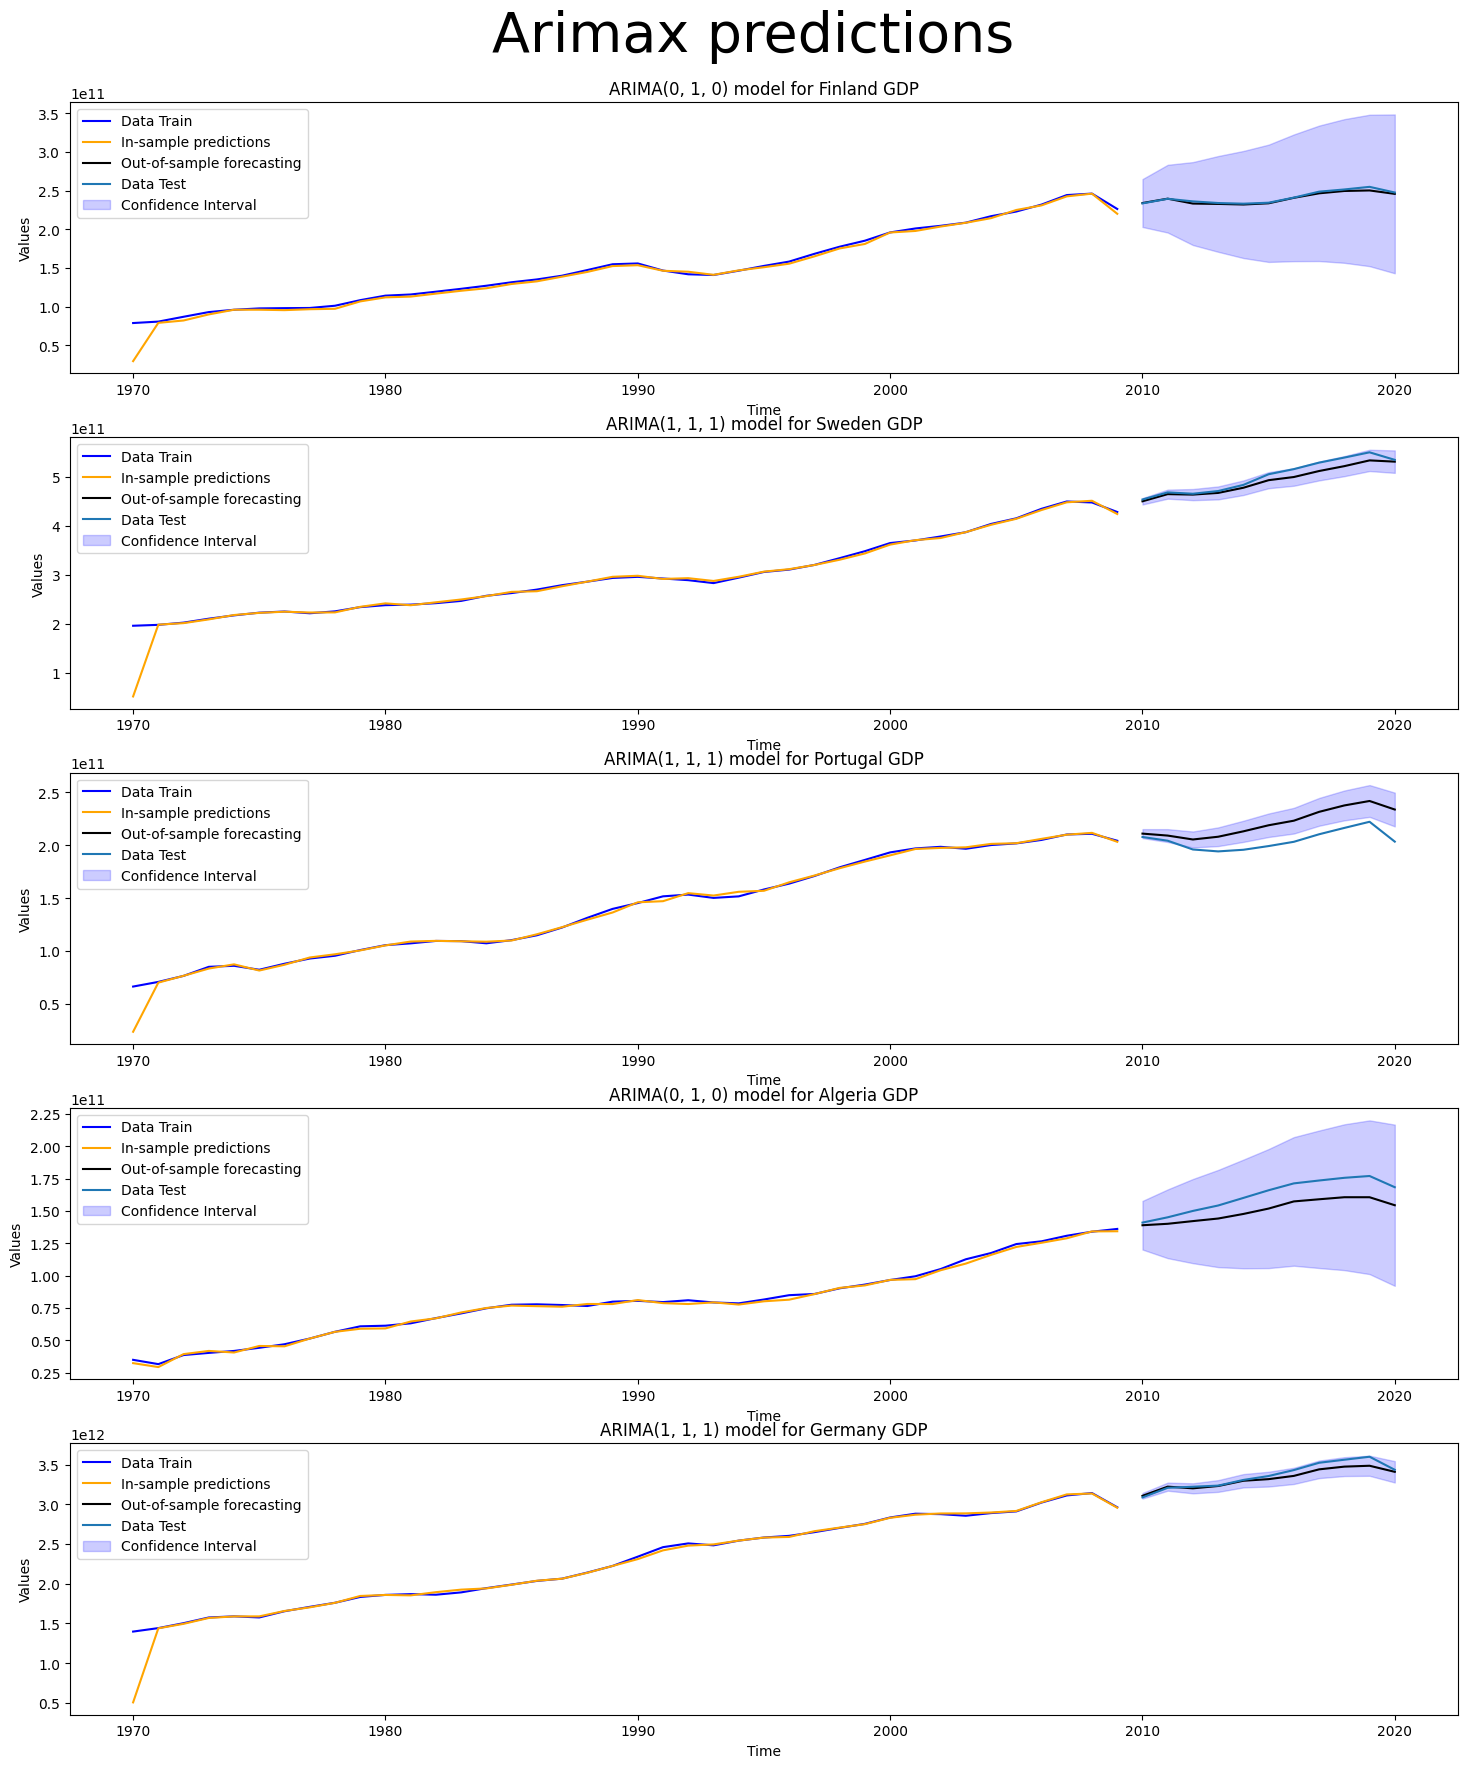

In [30]:
arima_prediction_list = f.arima_prediction_plot(arima_model_list, nation_list, order_list, df_train_test)

In [31]:
metrics_list_of_df = f.add_metrics('ARIMAX', arima_model_list, metrics_list_of_df, df_train_test, nation_list, arima_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


Model_name   AIC         MAE        RMSE      MAPE
0     ARIMAX  1914  1564501015  2013206937  0.006384

Sweden


Model_name   AIC         MAE         RMSE      MAPE
0     ARIMAX  1814  9224806808  11138238948  0.017841

Portugal


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1784  16446700202  18126099919  0.080107

Algeria


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1875  11399102259  12214533745  0.068706

Germany


Model_name   AIC          MAE         RMSE     MAPE
0     ARIMAX  1953  44635368918  57183781686  0.01289

## 10.2 ETS

### 10.2.1 Model identification

In [32]:
ets_model_list, ets_params = f.ets_order(df_train_test, nation_list)

In [33]:
ets_params

Error Trend Seasonal  Seasonal period  Damped trend
Finland    mul   add      add               12         False
Sweden     add   mul      mul                8         False
Portugal   add   add      mul                9         False
Algeria    add   mul      mul                9         False
Germany    mul   mul      mul               13         False

### 10.2.2 Model diagnostics

In [34]:
f.res_stats(ets_model_list, nation_list, df_train_test)

DW statistic for standardized residuals of Finland's model: 0.6744527500377289


lb_stat  lb_pvalue
1   5.474416   0.019297
2   5.480115   0.064567
3   5.538142   0.136375
4   5.616406   0.229685
5   5.698898   0.336628
6   5.722217   0.455016
7   5.741776   0.570204
8   6.123919   0.633353
9   8.249922   0.509170
10  8.335256   0.596125

JB p-value for standardized residuals of Finland's model: (useless, too few samples) 4.834619760652476e-27
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Sweden's model: 0.8014870436386808


lb_stat  lb_pvalue
1    8.423386   0.003704
2    8.434411   0.014740
3    8.985830   0.029480
4    9.283049   0.054401
5    9.301886   0.097612
6    9.574555   0.143750
7   10.381127   0.167984
8   14.600312   0.067399
9   17.673173   0.039160
10  17.745506   0.059411

JB p-value for standardized residuals of Sweden's model: (useless, too few samples) 0.3295983948165152
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Portugal's model: 1.2471888569698633


lb_stat  lb_pvalue
1   0.526258   0.468184
2   0.690696   0.707974
3   1.062934   0.786029
4   1.218482   0.875046
5   1.772598   0.879630
6   2.557755   0.861949
7   3.475648   0.837798
8   3.561678   0.894350
9   3.722719   0.928697
10  3.726234   0.958853

JB p-value for standardized residuals of Portugal's model: (useless, too few samples) 3.7916639807787543e-19
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Algeria's model: 1.7843680003533684


lb_stat  lb_pvalue
1    0.380466   0.537354
2    2.250340   0.324597
3    2.251053   0.521963
4    2.486558   0.647044
5    2.876035   0.719090
6    4.430502   0.618627
7    5.875483   0.554362
8   10.386635   0.238931
9   14.521910   0.104933
10  14.689355   0.143805

JB p-value for standardized residuals of Algeria's model: (useless, too few samples) 4.2453362330101224e-17
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Germany's model: 1.191787692763207


lb_stat  lb_pvalue
1   0.123082   0.725715
2   0.791945   0.673025
3   2.081478   0.555669
4   2.148037   0.708553
5   3.243024   0.662575
6   3.247008   0.777267
7   3.297275   0.856208
8   3.387744   0.907725
9   4.521235   0.873890
10  4.564703   0.918299

JB p-value for standardized residuals of Germany's model: (useless, too few samples) 4.8214365538808245e-87
-------------------------------------------------------------------------------


### 10.2.3 Model prediction

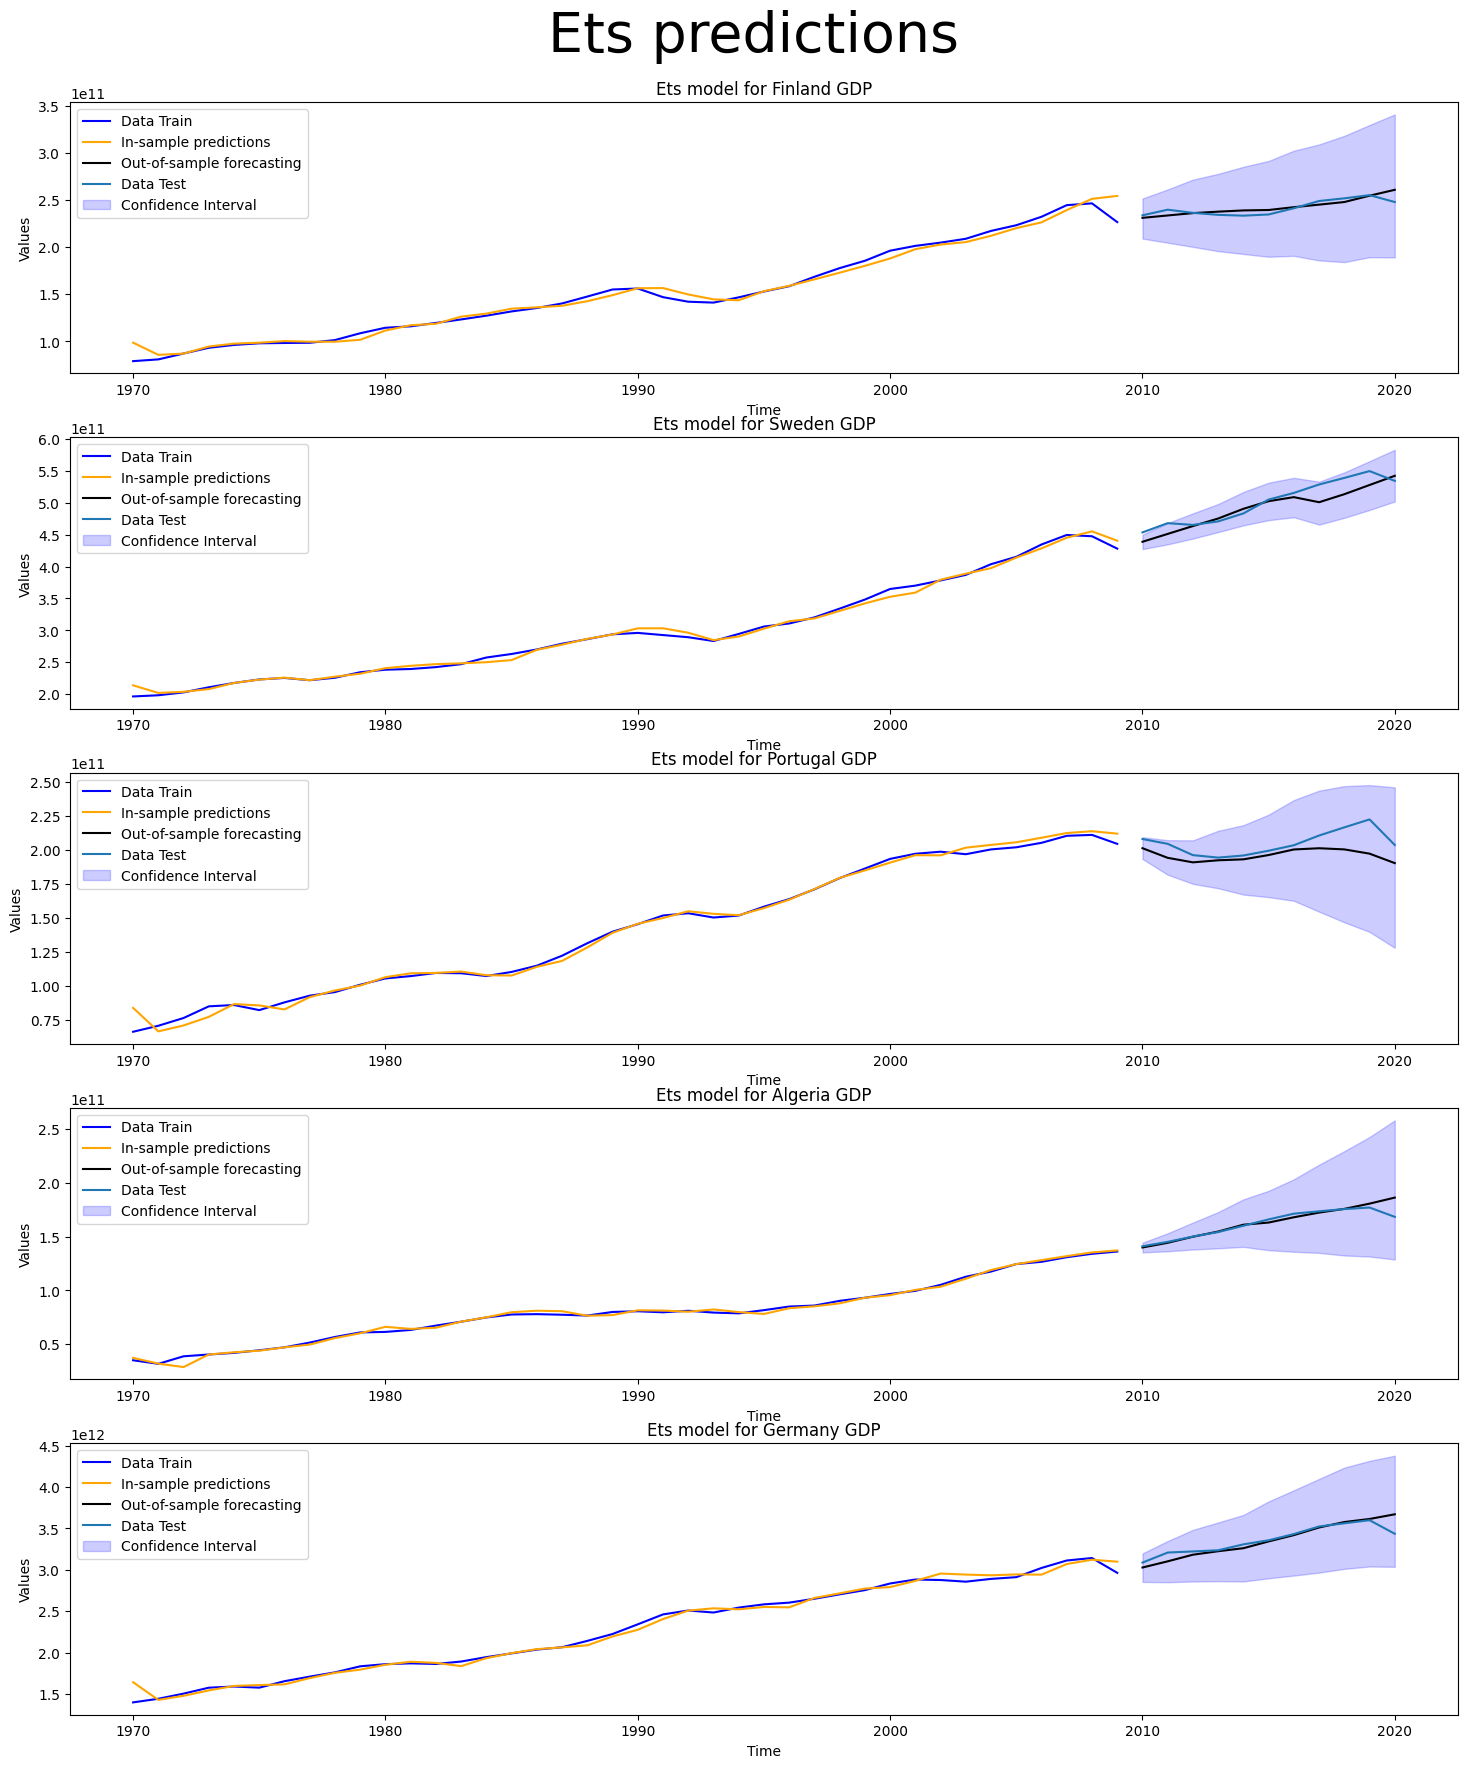

In [35]:
ets_prediction_list = f.ets_prediction_plot(ets_model_list, nation_list, df_train_test)

In [36]:
metrics_list_of_df = f.add_metrics('ETS', ets_model_list, metrics_list_of_df, df_train_test, nation_list, ets_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


Model_name   AIC         MAE        RMSE      MAPE
0     ARIMAX  1914  1564501015  2013206937  0.006384
0        ETS  1957  4117085592  5307628891   0.01704

Sweden


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1814   9224806808  11138238948  0.017841
0        ETS  1942  12494869884  15361134317  0.024486

Portugal


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1784  16446700202  18126099919  0.080107
0        ETS  1913   8843821834  11146055131  0.042069

Algeria


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1875  11399102259  12214533745  0.068706
0        ETS  1870   2985126766   5715523648   0.01786

Germany


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1953  44635368918  57183781686   0.01289
0        ETS  2143  51543010796  82608490133  0.015487

## 10.3 Vector Autoregressive 1

### 10.3.1 Model identification

In [37]:
grangers_col_list = f.grangers_causation_columns(df_train_test_log_dif, nation_list)

Finland
Best columns: ['Imports', 'Manufacturing']
Sweden
Best columns: ['Manufacturing', 'Gross_capital']
Portugal
Best columns: ['Exports', 'Manufacturing']
Algeria
Best columns: ['Imports', 'Gross_capital']
Germany
Best columns: ['Exports', 'Imports']


In [38]:
varmax1_order, varmax1_model_list = f.varma1_order(df_train_test_log_dif, nation_list, grangers_col_list)

Processing nation: Finland
Best order for Finland: (p, q)=(2, 2), AIC=5218.371916095483
Processing nation: Sweden
Best order for Sweden: (p, q)=(1, 1), AIC=5383.577752748439
Processing nation: Portugal
Best order for Portugal: (p, q)=(2, 1), AIC=5194.560032983072
Processing nation: Algeria
Best order for Algeria: (p, q)=(1, 1), AIC=5359.858147871291
Processing nation: Germany
Best order for Germany: (p, q)=(1, 1), AIC=5817.16059790506


### 10.3.2 Model diagnostics

In [ ]:
try:
    f.arima_diagnostics(varmax1_model_list, nation_list)
    f.res_stats(varmax1_model_list, nation_list, df_train_test_log_dif)
except Exception as e:
    print(e)
    pass

### 10.3.3 Model prediction

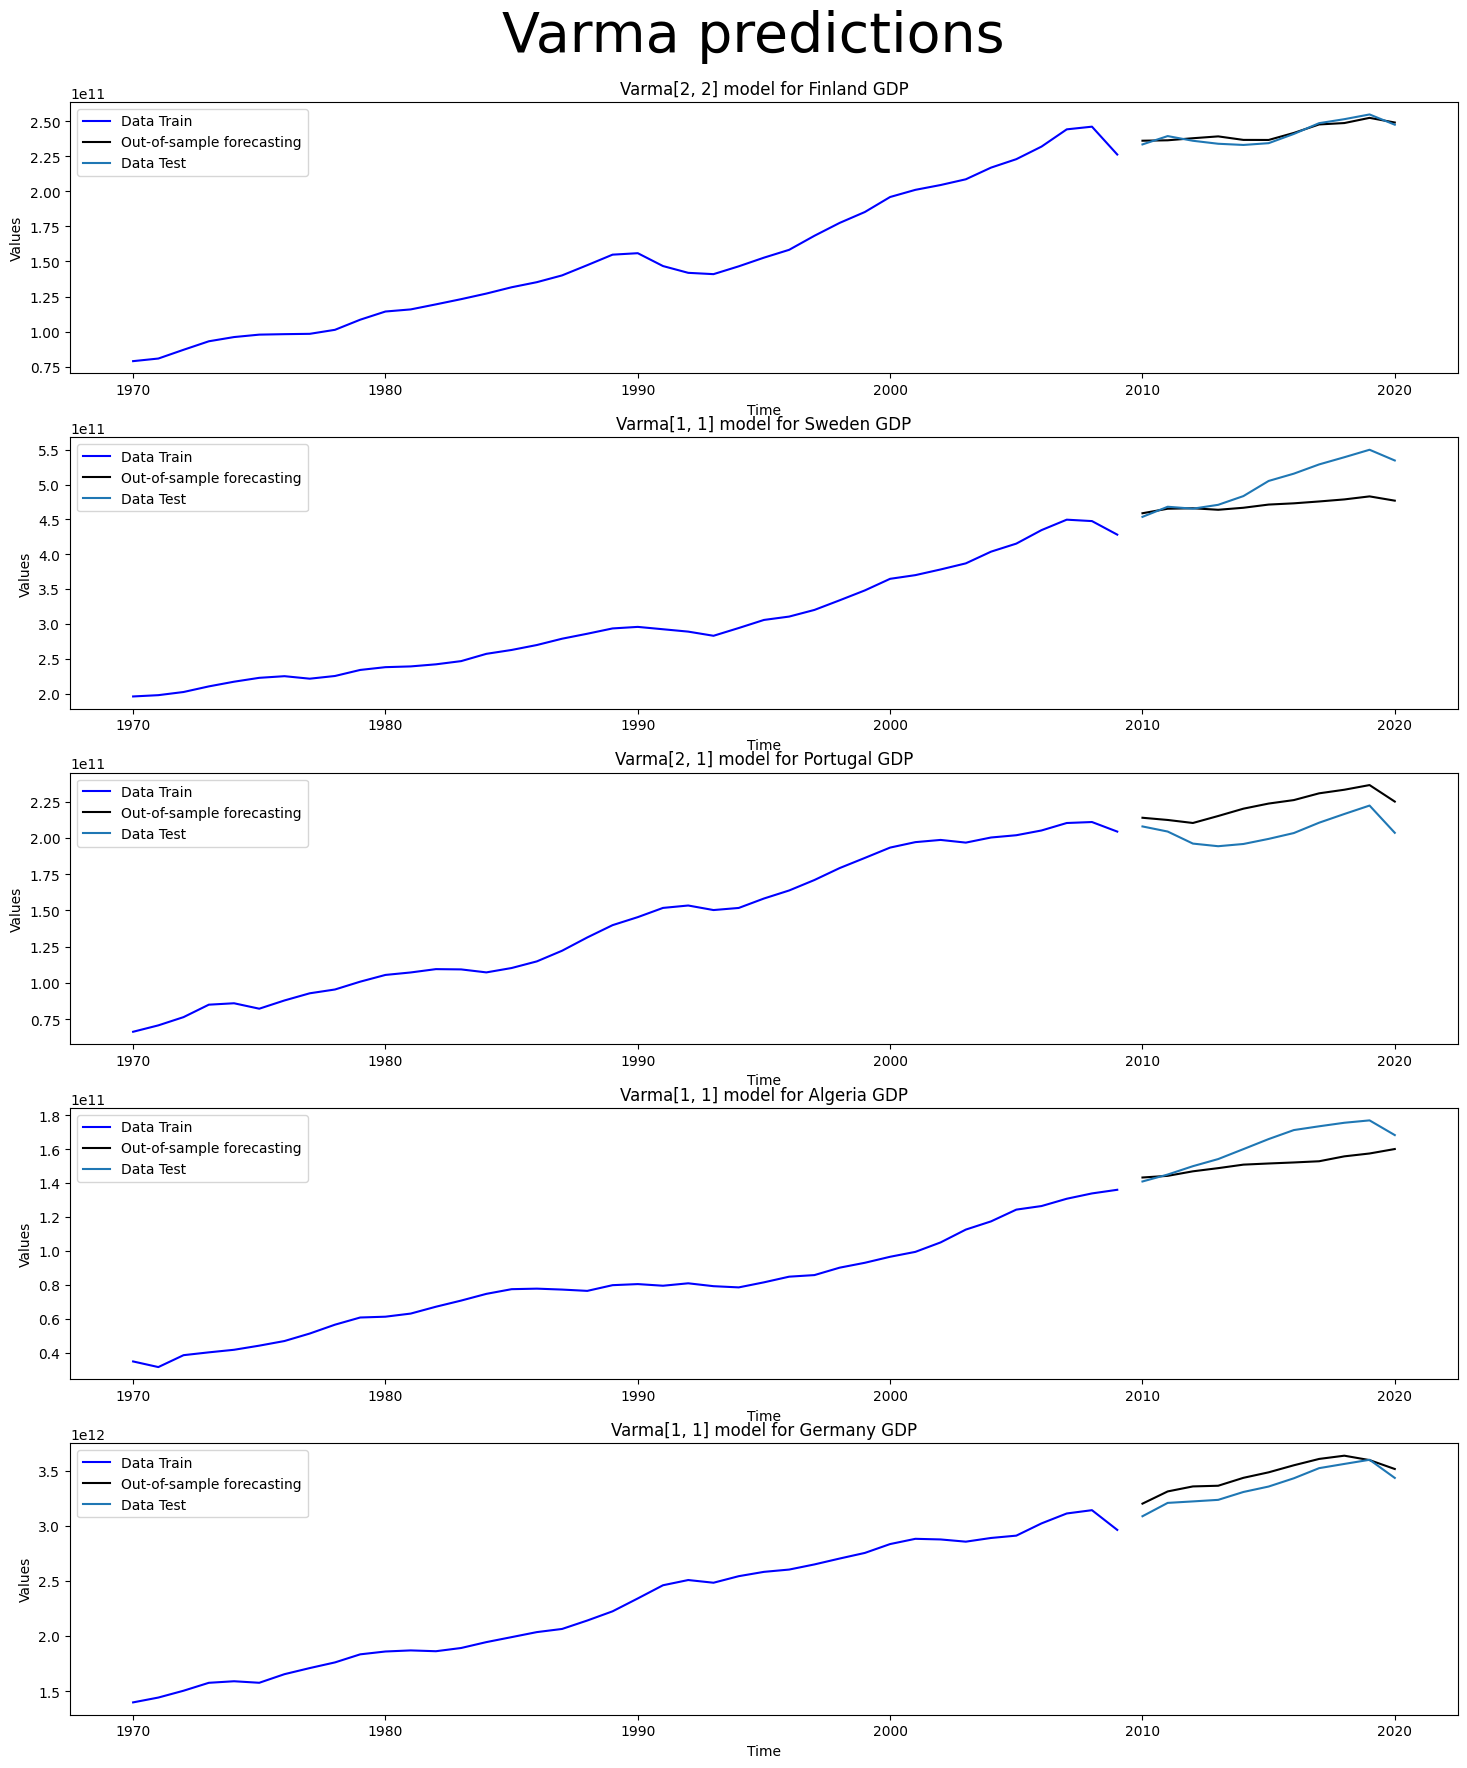

In [40]:
varmax1_prediction_list = f.varma1_prediction_plot(varmax1_model_list, nation_list, varmax1_order, df_train_test, df_train_test_log_dif, grangers_col_list)

In [41]:
metrics_list_of_df = f.add_metrics('VARMAX', varmax1_model_list, metrics_list_of_df, df_train_test, nation_list, varmax1_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


Model_name   AIC         MAE        RMSE      MAPE
0     ARIMAX  1914  1564501015  2013206937  0.006384
0        ETS  1957  4117085592  5307628891   0.01704
0     VARMAX  5218  2457971232  2741688174  0.010261

Sweden


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1814   9224806808  11138238948  0.017841
0        ETS  1942  12494869884  15361134317  0.024486
0     VARMAX  5384  31533008968  39985696832  0.059993

Portugal


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1784  16446700202  18126099919  0.080107
0        ETS  1913   8843821834  11146055131  0.042069
0     VARMAX  5195  17535519326  18546844471  0.086164

Algeria


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1875  11399102259  12214533745  0.068706
0        ETS  1870   2985126766   5715523648   0.01786
0     VARMAX  5360  11117294119  13366585879  0.065716

Germany


Model_name   AIC          MAE          RMSE      MAPE
0     ARIMAX  1953  44635368918   57183781686   0.01289
0        ETS  2143  51543010796   82608490133  0.015487
0     VARMAX  5817  99972813270  106563587491  0.030175

## 10.4 Vector Autoregressive 2

### 10.4.1 Model identification

In [43]:
varmax2_order, varmax2_model_list = f.varma2_order(df_train_test_log_dif, nation_list)

Processing nation: Finland
Best order for Finland: (p, q) = (1, 1), AIC = 8871.88063418985
Processing nation: Sweden
Best order for Sweden: (p, q) = (1, 1), AIC = 9084.199447832341
Processing nation: Portugal
Best order for Portugal: (p, q) = (2, 1), AIC = 8802.286452678802
Processing nation: Algeria
Best order for Algeria: (p, q) = (1, 1), AIC = 8753.990775478362
Processing nation: Germany
Best order for Germany: (p, q) = (1, 1), AIC = 9786.8234026027


### 10.4.2 Model diagnostics

### 10.4.3 Model prediction

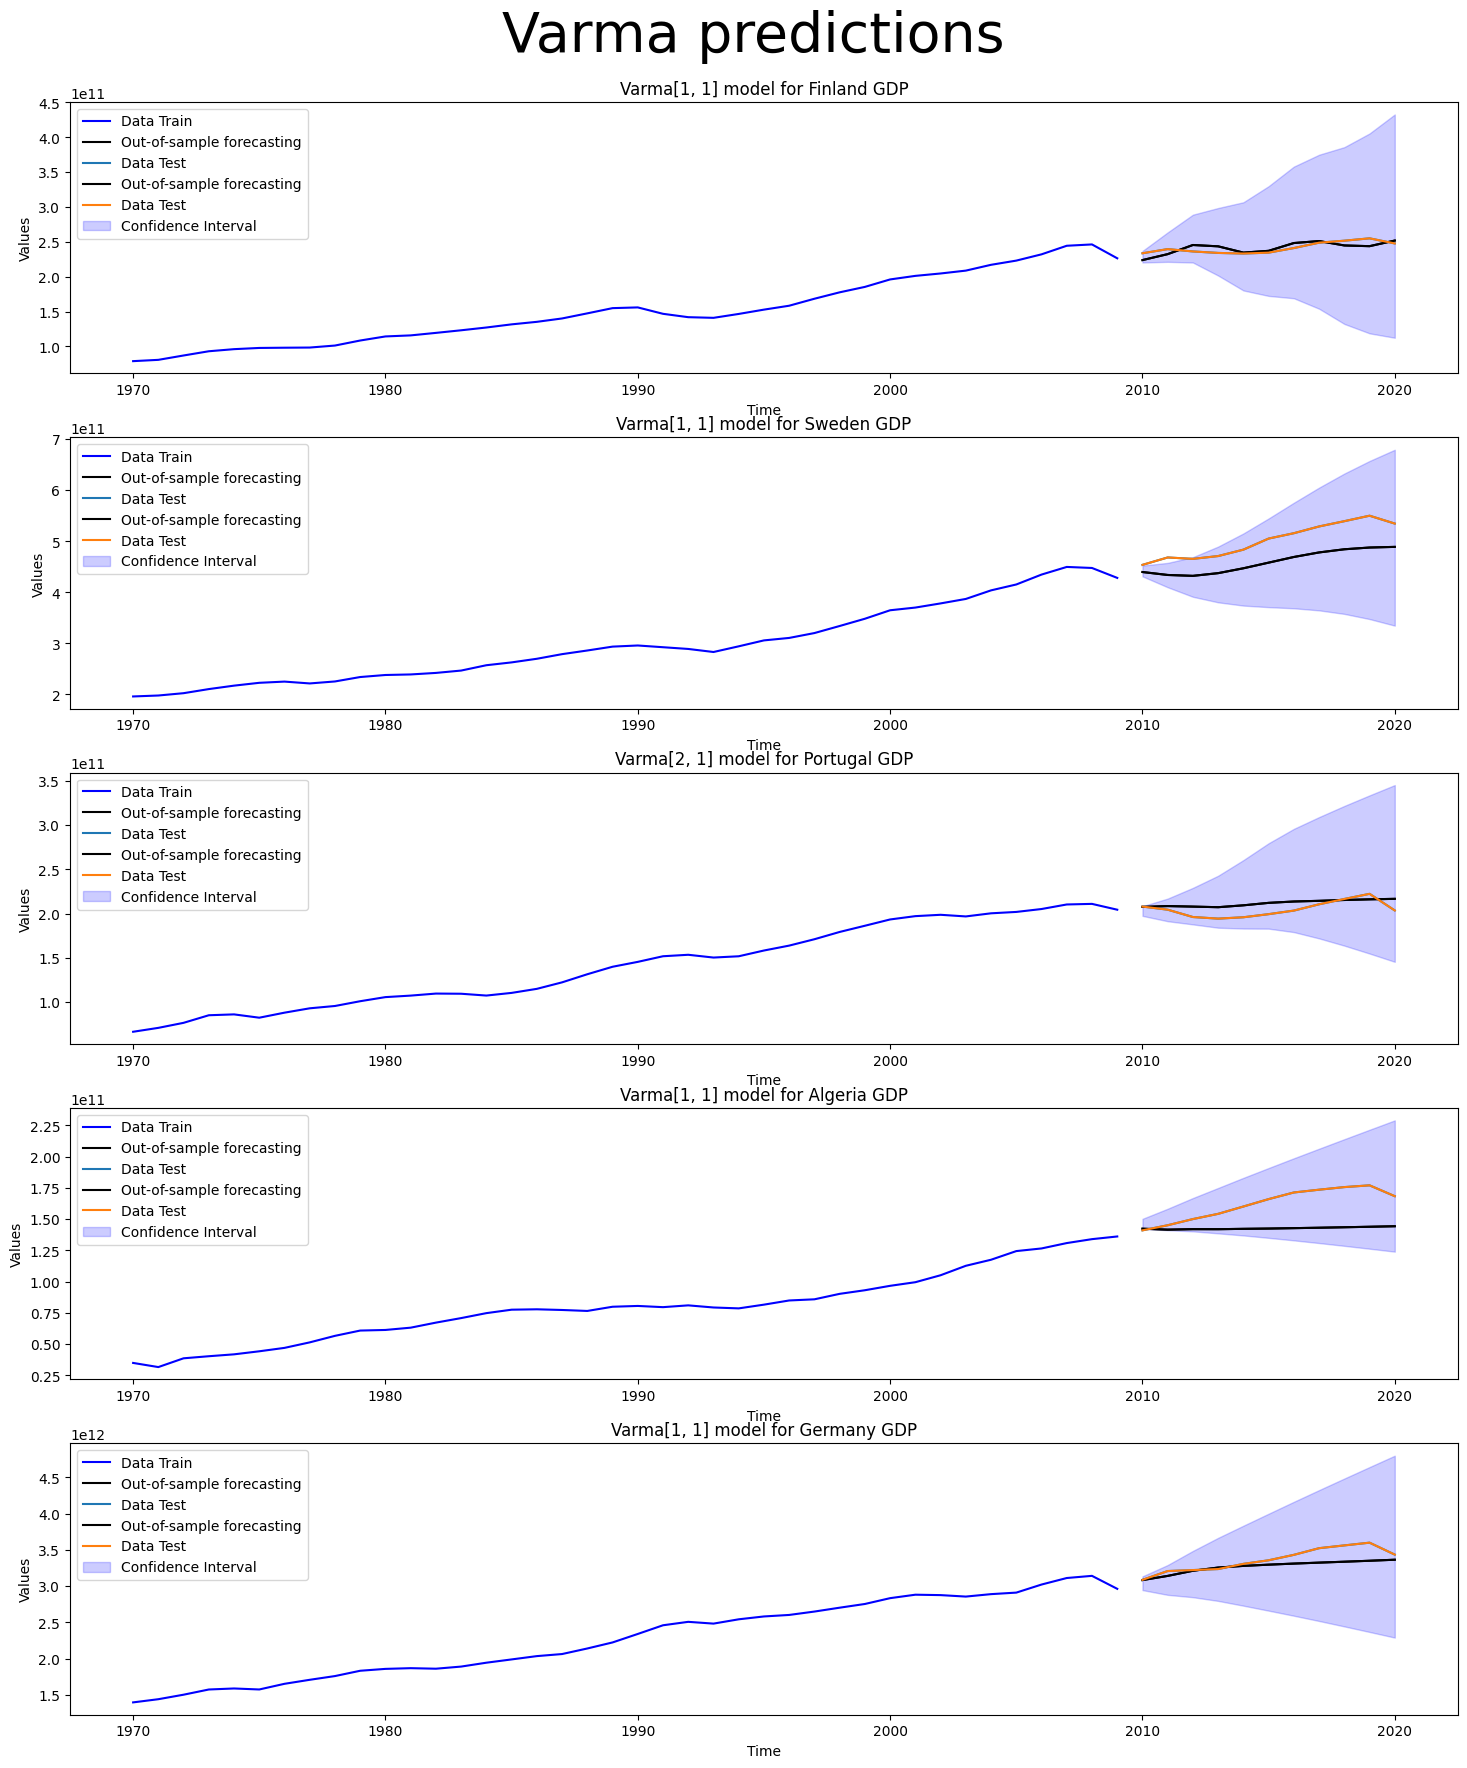

In [44]:
varmax2_prediction_list = f.varma2_prediction_plot(varmax2_model_list, nation_list, varmax2_order, df_train_test, df_train_test_log_dif)

In [45]:
metrics_list_of_df = f.add_metrics('VARMA', varmax2_model_list, metrics_list_of_df, df_train_test, nation_list, varmax2_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


Model_name   AIC         MAE        RMSE      MAPE
0     ARIMAX  1914  1564501015  2013206937  0.006384
0        ETS  1957  4117085592  5307628891   0.01704
0     VARMAX  5218  2457971232  2741688174  0.010261
0      VARMA  8872  6481554013  7245747162  0.026841

Sweden


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1814   9224806808  11138238948  0.017841
0        ETS  1942  12494869884  15361134317  0.024486
0     VARMAX  5384  31533008968  39985696832  0.059993
0      VARMA  9084  41698675515  43555195406  0.082004

Portugal


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1784  16446700202  18126099919  0.080107
0        ETS  1913   8843821834  11146055131  0.042069
0     VARMAX  5195  17535519326  18546844471  0.086164
0      VARMA  8802   8187859908   9531519417  0.040734

Algeria


Model_name   AIC          MAE         RMSE      MAPE
0     ARIMAX  1875  11399102259  12214533745  0.068706
0        ETS  1870   2985126766   5715523648   0.01786
0     VARMAX  5360  11117294119  13366585879  0.065716
0      VARMA  8754  19542961206  22478306189  0.116007

Germany


Model_name   AIC          MAE          RMSE      MAPE
0     ARIMAX  1953  44635368918   57183781686   0.01289
0        ETS  2143  51543010796   82608490133  0.015487
0     VARMAX  5817  99972813270  106563587491  0.030175
0      VARMA  9787  95676056829  128309849202  0.027466

# Best model

In [46]:
f.best_model(metrics_list_of_df, nation_list)

Best AIC Best MAE Best RMSE Best MAPE
Finland   ARIMAX   ARIMAX    ARIMAX    ARIMAX

Best AIC Best MAE Best RMSE Best MAPE
Sweden   ARIMAX   ARIMAX    ARIMAX    ARIMAX

Best AIC Best MAE Best RMSE Best MAPE
Portugal   ARIMAX    VARMA     VARMA     VARMA

Best AIC Best MAE Best RMSE Best MAPE
Algeria      ETS      ETS       ETS       ETS

Best AIC Best MAE Best RMSE Best MAPE
Germany   ARIMAX   ARIMAX    ARIMAX    ARIMAX

# TO-DO

- Add fitted values to varmax models
- VARMA
    - diagnostics
- funzioni documentation
- readme